# Punto 2

## Librerías Utilizadas

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency
import plotly.express as px
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

## Wind Speed EDA

Iniciamos cargando el dataset y observando las primeras filas.

In [60]:
wind = pd.read_csv("https://raw.githubusercontent.com/lihkir/Data/main/wind_speed/data_treino_dv_df_2000_2010.csv")
wind.head()

HORA (UTC)  VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))  \
0      12:00                                    0.809017   
1      13:00                                    0.965926   
2      14:00                                    0.891007   
3      15:00                                    0.848048   
4      16:00                                    0.224951   

   VENTO, VELOCIDADE HORARIA (m/s)  UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)  \
0                              1.8                                      69.0   
1                              2.7                                      62.0   
2                              2.0                                      56.0   
3                              2.5                                      52.0   
4                              2.4                                      50.0   

   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)  \
0                                      60.0   
1                                      55.0   
2                                      50.0   
3                                      44.0   
4                                      43.0   

   TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)  \
0                                            22.6   
1                                            24.2   
2                                            25.5   
3                                            27.4   
4                                            27.1   

   TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)  \
0                                            20.7   
1                                            22.5   
2                                            24.3   
3                                            25.0   
4                                            25.5   

   UMIDADE RELATIVA DO AR, HORARIA (%)  \
0                                 61.0   
1                                 55.0   
2                                 51.0   
3                                 44.0   
4                                 46.0   

   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
0                                              888.2       
1                                              888.4       
2                                              888.1       
3                                              887.4       
4                                              886.5       

   PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)  VENTO, RAJADA MAXIMA (m/s)  \
0                                     0.0                         3.8   
1                                     0.0                         4.7   
2                                     0.0                         4.9   
3                                     0.0                         5.8   
4                                     0.0                         5.8   

   PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
0                                              888.2   
1                                              888.4   
2                                              888.4   
3                                              888.1   
4                                              887.4   

   PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  
0                                              887.7   
1                                              888.2   
2                                              888.1   
3                                              887.4   
4                                              886.5

A primera vista se puede notar que las columnas tienen nombres muy largos y que se dificulta la interpretación de cada variable. También, se observa que todas las variables son numéricas, a excepción de la hora que es temporal. Veamos con más detalle los nombres de las columnas.

In [61]:
wind.columns

Index(['HORA (UTC)', 'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))',
       'VENTO, VELOCIDADE HORARIA (m/s)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)',
       'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)', 'VENTO, RAJADA MAXIMA (m/s)',
       'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'],
      dtype='object')

Procederemos a realizar un cambio en los nombres de las columnas puesto que se dificulta la lectura de estas. El dataset con las nombres de las variables cambiadas es el siguiente:

In [62]:
columnas = {'HORA (UTC)': 'hora', 'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))': 'direccion_viento', 
            'VENTO, VELOCIDADE HORARIA (m/s)': 'velocidad_viento', 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'humedad_max',
            'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'humedad_min', 'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)': 'temperatura_max',
            'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)': 'temperatura_min', 'UMIDADE RELATIVA DO AR, HORARIA (%)': 'humedad_horaria',
            'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pres_atmosferica', 'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)': 'precipitacion_hora',
            'VENTO, RAJADA MAXIMA (m/s)': 'rafaga_max', 'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'pres_atmosferica_max', 'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'pres_atmosferica_min'}
wind = wind.rename(columns=columnas)
wind.head()

hora  direccion_viento  velocidad_viento  humedad_max  humedad_min  \
0  12:00          0.809017               1.8         69.0         60.0   
1  13:00          0.965926               2.7         62.0         55.0   
2  14:00          0.891007               2.0         56.0         50.0   
3  15:00          0.848048               2.5         52.0         44.0   
4  16:00          0.224951               2.4         50.0         43.0   

   temperatura_max  temperatura_min  humedad_horaria  pres_atmosferica  \
0             22.6             20.7             61.0             888.2   
1             24.2             22.5             55.0             888.4   
2             25.5             24.3             51.0             888.1   
3             27.4             25.0             44.0             887.4   
4             27.1             25.5             46.0             886.5   

   precipitacion_hora  rafaga_max  pres_atmosferica_max  pres_atmosferica_min  
0                 0.0         3.8                 888.2                 887.7  
1                 0.0         4.7                 888.4                 888.2  
2                 0.0         4.9                 888.4                 888.1  
3                 0.0         5.8                 888.1                 887.4  
4                 0.0         5.8                 887.4                 886.5

Diccionario de variables modificadas:
- **hora**: hora
- **direccion_viento**: Dirección del viento horaria
- **velocidad_viento**: Velocidad horario del viento (m/s) --- (Variable predictora)
- **humedad_max**: Humedad rel. máx. hora anterior (AUT) ( %)
- **humedad_min**: Humedad rel. mín. hora anterior (AUT) ( %)
- **temperatura_max**: Temperatura máx. hora anterior (AUT)
- **temperatura_min**: Temperatura mín. hora anterior (AUT)
- **humedad_horaria**: Humedad relativa horaria ( %)
- **pres_atmosferica**: Presión atmosférica a nivel de estación, horaria (mB)
- **precipitacion_hora**: Precipitación total por hora (mm)
- **rafaga_max**: Máxima ráfaga de viento (m/s)
- **pres_atmosferica_max**: Presión atmosférica máx. hora anterior (AUT) (mB)
- **pres_atmosferica_min**: Presión atmosférica mín. hora anterior (AUT) (mB)

Ahora analicemos el resumen descriptivo de los datos usando la funcion *describe()*

In [63]:
wind.describe()

direccion_viento  velocidad_viento   humedad_max   humedad_min  \
count      87693.000000      87693.000000  87693.000000  87693.000000   
mean           0.405810          2.466192     69.058465     63.176194   
std            0.686247          1.313968     19.640222     20.166336   
min           -1.000000          0.000000     12.000000     10.000000   
25%           -0.156434          1.500000     54.000000     48.000000   
50%            0.788011          2.400000     72.000000     64.000000   
75%            0.970296          3.400000     87.000000     80.000000   
max            1.000000         10.000000    100.000000     98.000000   

       temperatura_max  temperatura_min  humedad_horaria  pres_atmosferica  \
count     87693.000000     87693.000000     87693.000000      87693.000000   
mean         21.921264        20.684570        66.146682        887.251925   
std           3.721386         3.513744        19.992327          4.012404   
min           9.200000         8.400000        10.000000        863.400000   
25%          19.200000        18.400000        51.000000        885.300000   
50%          21.400000        20.200000        68.000000        887.200000   
75%          24.700000        23.100000        84.000000        889.100000   
max          35.300000        34.400000        99.000000       1023.500000   

       precipitacion_hora    rafaga_max  pres_atmosferica_max  \
count        87693.000000  87693.000000          87693.000000   
mean             0.160907      5.161076            887.580724   
std              1.307515      2.311157              3.646750   
min              0.000000      0.000000            865.300000   
25%              0.000000      3.400000            885.600000   
50%              0.000000      5.000000            887.500000   
75%              0.000000      6.800000            889.300000   
max             70.800000     24.300000            913.100000   

       pres_atmosferica_min  
count          87693.000000  
mean             886.891093  
std                3.564539  
min              862.800000  
25%              885.000000  
50%              886.900000  
75%              888.800000  
max              910.900000

En primer lugar se observa que para todas las variables se registran 87693 observaciones. 
- **velocidad_viento**: Con respecto a la variable respuesta, se puede notar que esta variable se distribuye con un mínimo de 0.0 m/s hasta un máximo de 10 m/s, con una velocidad media de 2.46 m/s y una desviación de 1.31. Se puede identificar una dispersión de los datos baja. Asimismo el 50% tiene una velocidad de 2.4 m/s o menos.

- **direccion_viento**: para esta variable se observa que se distribuye con un mínimo de -1 hasta un máximo de 1, con una dirección media de 0.4 y una desviación de 0.68. Se puede identificar una dispersión de los datos significativa. Asimismo el 50% de las observaciones tiene una dirección de 0.78 o menos.

- **humedad_max**: esta variable se distribuye con una humedad mínima de 12 hasta un máximo de 100, con una humedad media de 69.05 y una desviación de 19.64. Se puede identificar una dispersión de los datos media. Asimismo el 50% de las observaciones tiene una humedad de 72 o menos.

- **humedad_min**: esta variable se distribuye con una humedad mínima de 10 hasta un máximo de 98, con una humedad media de 63.176 y una desviación de 20.16. Se puede identificar una dispersión de los datos alta. Asimismo el 25% de las observaciones tiene una humedad de 48 o menos.

- **temperatura_max**: esta variable se distribuye con una temperatura mínima de 9.2 hasta un máximo de 35.3, con una temperatura media de 21.92 y una desviación de 3.72. Asimismo el 25% de las observaciones tiene una temperatura de 19.2 o menos, y el 50% de los datos posee una temperatura de 21.4 o menos.

- **temperatura_min**: esta variable se distribuye con una temperatura mínima de 3.51 hasta un máximo de 34.4, con una temperatura media de 20.68 y una desviación de 3.51. Asimismo el 25% de las observaciones tiene una temperatura de 18.4o menos, y el 50% de los datos posee una temperatura de 20.2 o menos.

- **humedad_horaria**: esta variable se distribuye con una humedad relativa mínima de 10 hasta un máximo de 99, con una humedada media de 66.14 y una desviación de 19.9. Se observa una dispersión alta de los datos.Asimismo el 25% de las observaciones tiene una humedad de 51 o menos, y el 50% de los datos posee una temperatura de 68 o menos.

- **pres_atmosferica**: esta variable se distribuye con una presión atmosférica mínima de 863.4 hasta un máximo de 1023.5, con una presión atmosférica media de 887.25 y una desviación de 4.012. Se observa una dispersión baja de los datos. Asimismo el 25% de las observaciones tiene una humedad de 885.3 o menos, y el 50% de los datos posee una temperatura de 887.20 o menos.

- **precipitacion_hora**: esta variable se distribuye con una precipitación total mínima de 0 hasta un máximo de 70.8, con una precipitación media de 0.16.25 y una desviación de 1.30. 

- **rafaga_max**: esta variable se distribuye con una ráfaga de viento mínima de 0 m/s hasta un máximo de 24.3 m/s, con una ráfaga media de 5.16 y una desviación de 2.31. Asimismo el 25% de las observaciones tiene una ráfaga máxima de 3.4 m/s o menos, y el 50% de los datos posee una ráfaga máxima de 6.8 o menos.

- **pres_atmosferica_max**: esta variable se distribuye con una presión atmosférica mínima de 865.3 hasta un máximo de 913.1, con una presión atmosférica media de 887.5 y una desviación de 3.64. Se observa una dispersión baja de los datos. Asimismo el 25% de las observaciones tiene una humedad de 865.3 o menos, y el 50% de los datos posee una temperatura de 887.5 o menos.

- **pres_atmosferica_min**: esta variable se distribuye con una presión atmosférica mínima de 862.8 hasta un máximo de 910.9, con una presión atmosférica media de 886.89 y una desviación de 3.56 .Se observa una dispersión baja de los datos. Asimismo el 25% de las observaciones tiene una humedad de 885.0 o menos, y el 50% de los datos posee una temperatura de 886.9 o menos.

Ahora veamos el tipo de dato de las variables

In [64]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hora                  87693 non-null  object 
 1   direccion_viento      87693 non-null  float64
 2   velocidad_viento      87693 non-null  float64
 3   humedad_max           87693 non-null  float64
 4   humedad_min           87693 non-null  float64
 5   temperatura_max       87693 non-null  float64
 6   temperatura_min       87693 non-null  float64
 7   humedad_horaria       87693 non-null  float64
 8   pres_atmosferica      87693 non-null  float64
 9   precipitacion_hora    87693 non-null  float64
 10  rafaga_max            87693 non-null  float64
 11  pres_atmosferica_max  87693 non-null  float64
 12  pres_atmosferica_min  87693 non-null  float64
dtypes: float64(12), object(1)
memory usage: 8.7+ MB


Se observa que todas las variables son númericas decimales a excepción de la hora es un string. También, se observa que no hay nulos. Sin embargo, comprobemoslo con la función *isna()*.

In [65]:
datos_faltantes = wind.isna().sum()
porcentaje_faltante = (datos_faltantes / len(wind)) * 100
print(porcentaje_faltante)
print("No hay datos faltantes")

hora                    0.0
direccion_viento        0.0
velocidad_viento        0.0
humedad_max             0.0
humedad_min             0.0
temperatura_max         0.0
temperatura_min         0.0
humedad_horaria         0.0
pres_atmosferica        0.0
precipitacion_hora      0.0
rafaga_max              0.0
pres_atmosferica_max    0.0
pres_atmosferica_min    0.0
dtype: float64
No hay datos faltantes


En efecto, no hay datos faltantes por lo que no es necesario usar técnicas de imputación de los datos.

Histogramas de variables explicativas e independiente

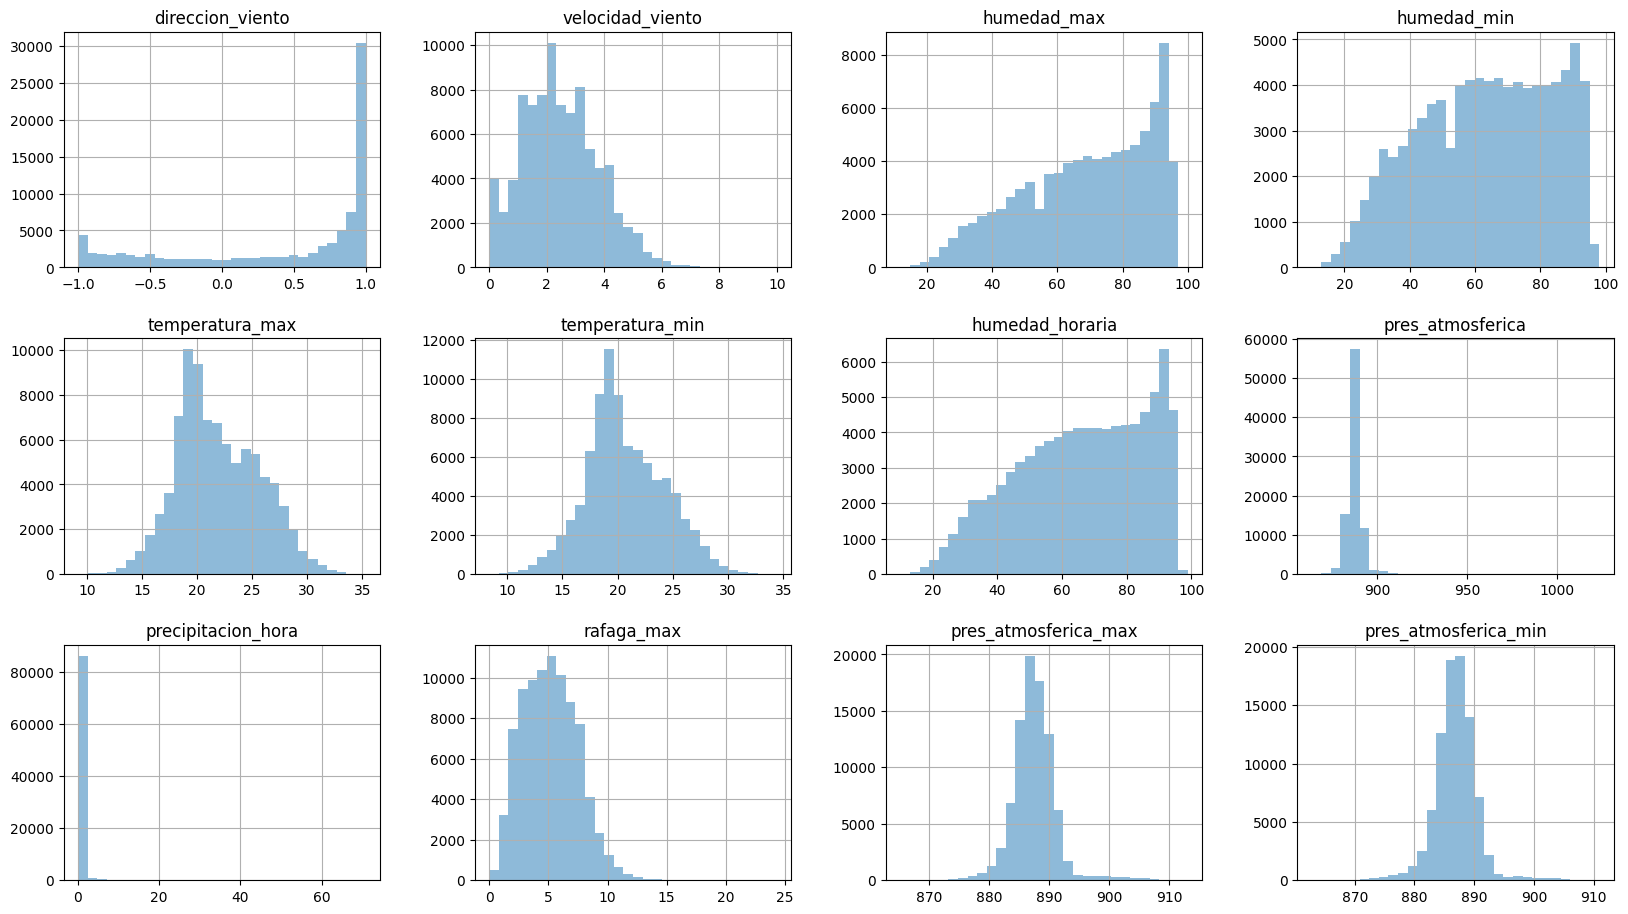

In [66]:
wind.hist(bins=30, figsize=(20, 15), layout=(4, 4), alpha=0.5)
plt.show()

**direccion_viento:** La mayoría de las mediciones están alrededor del valor entre 0.5 y 1, lo que indica que hay una dirección predominante del viento.

**velocidad_viento:** Este histograma muestra que las velocidades más frecuentes del viento están entre 0 y 2, con una disminución en la frecuencia a medida que aumenta la velocidad.

**humedad_max:** La humedad máxima tiende a distribuirse de manera relativamente uniforme entre aproximadamente el 40% y el 100%, con una ligera concentración de datos hacia el extremo superior.

**humedad_min:** Los datos de humedad mínima tienden a estar en el rango superior, entre el 60% y el 100%, con muy pocos eventos de baja humedad.

**temperatura_max:** Las temperaturas máximas se concentran principalmente entre los 20 y los 25 grados, con la frecuencia disminuyendo para temperaturas más altas y más bajas.

**temperatura_min:** Similar a la temperatura máxima, la mayoría de las temperaturas mínimas se distribuyen entre 15 y 25 grados, con una caída en la frecuencia a valores más bajos y más altos.

**humedad_horaria:** Este histograma es similar al de la humedad máxima y mínima, indicando que la humedad en una base horaria tiende a estar en el rango medio a alto.

**pres_atmosferica:** Existe una marcada concentración de valores alrededor de los 900, lo que indica que la presión atmosférica no varía tanto y tiende a ser alta.

**precipitacion_hora:** La mayoría de las mediciones de precipitación horaria son cercanas a cero, lo que sugiere que la lluvia no es un evento frecuente.

**rafaga_max:** La velocidad de ráfaga máxima tiende a estar por debajo de los 10, con una frecuencia que disminuye rápidamente a medida que aumenta la velocidad de la ráfaga.

**pres_atmosferica_max:** La presión atmosférica máxima está muy concentrada alrededor de los valores altos, similar a la presión atmosférica general.

**pres_atmosferica_min:** Los datos de la presión atmosférica mínima también muestran una fuerte concentración alrededor de los 1000, aunque hay una pequeña cantidad de casos con valores significativamente más bajos.

Análisis de simetría y datos atípicos con boxplot

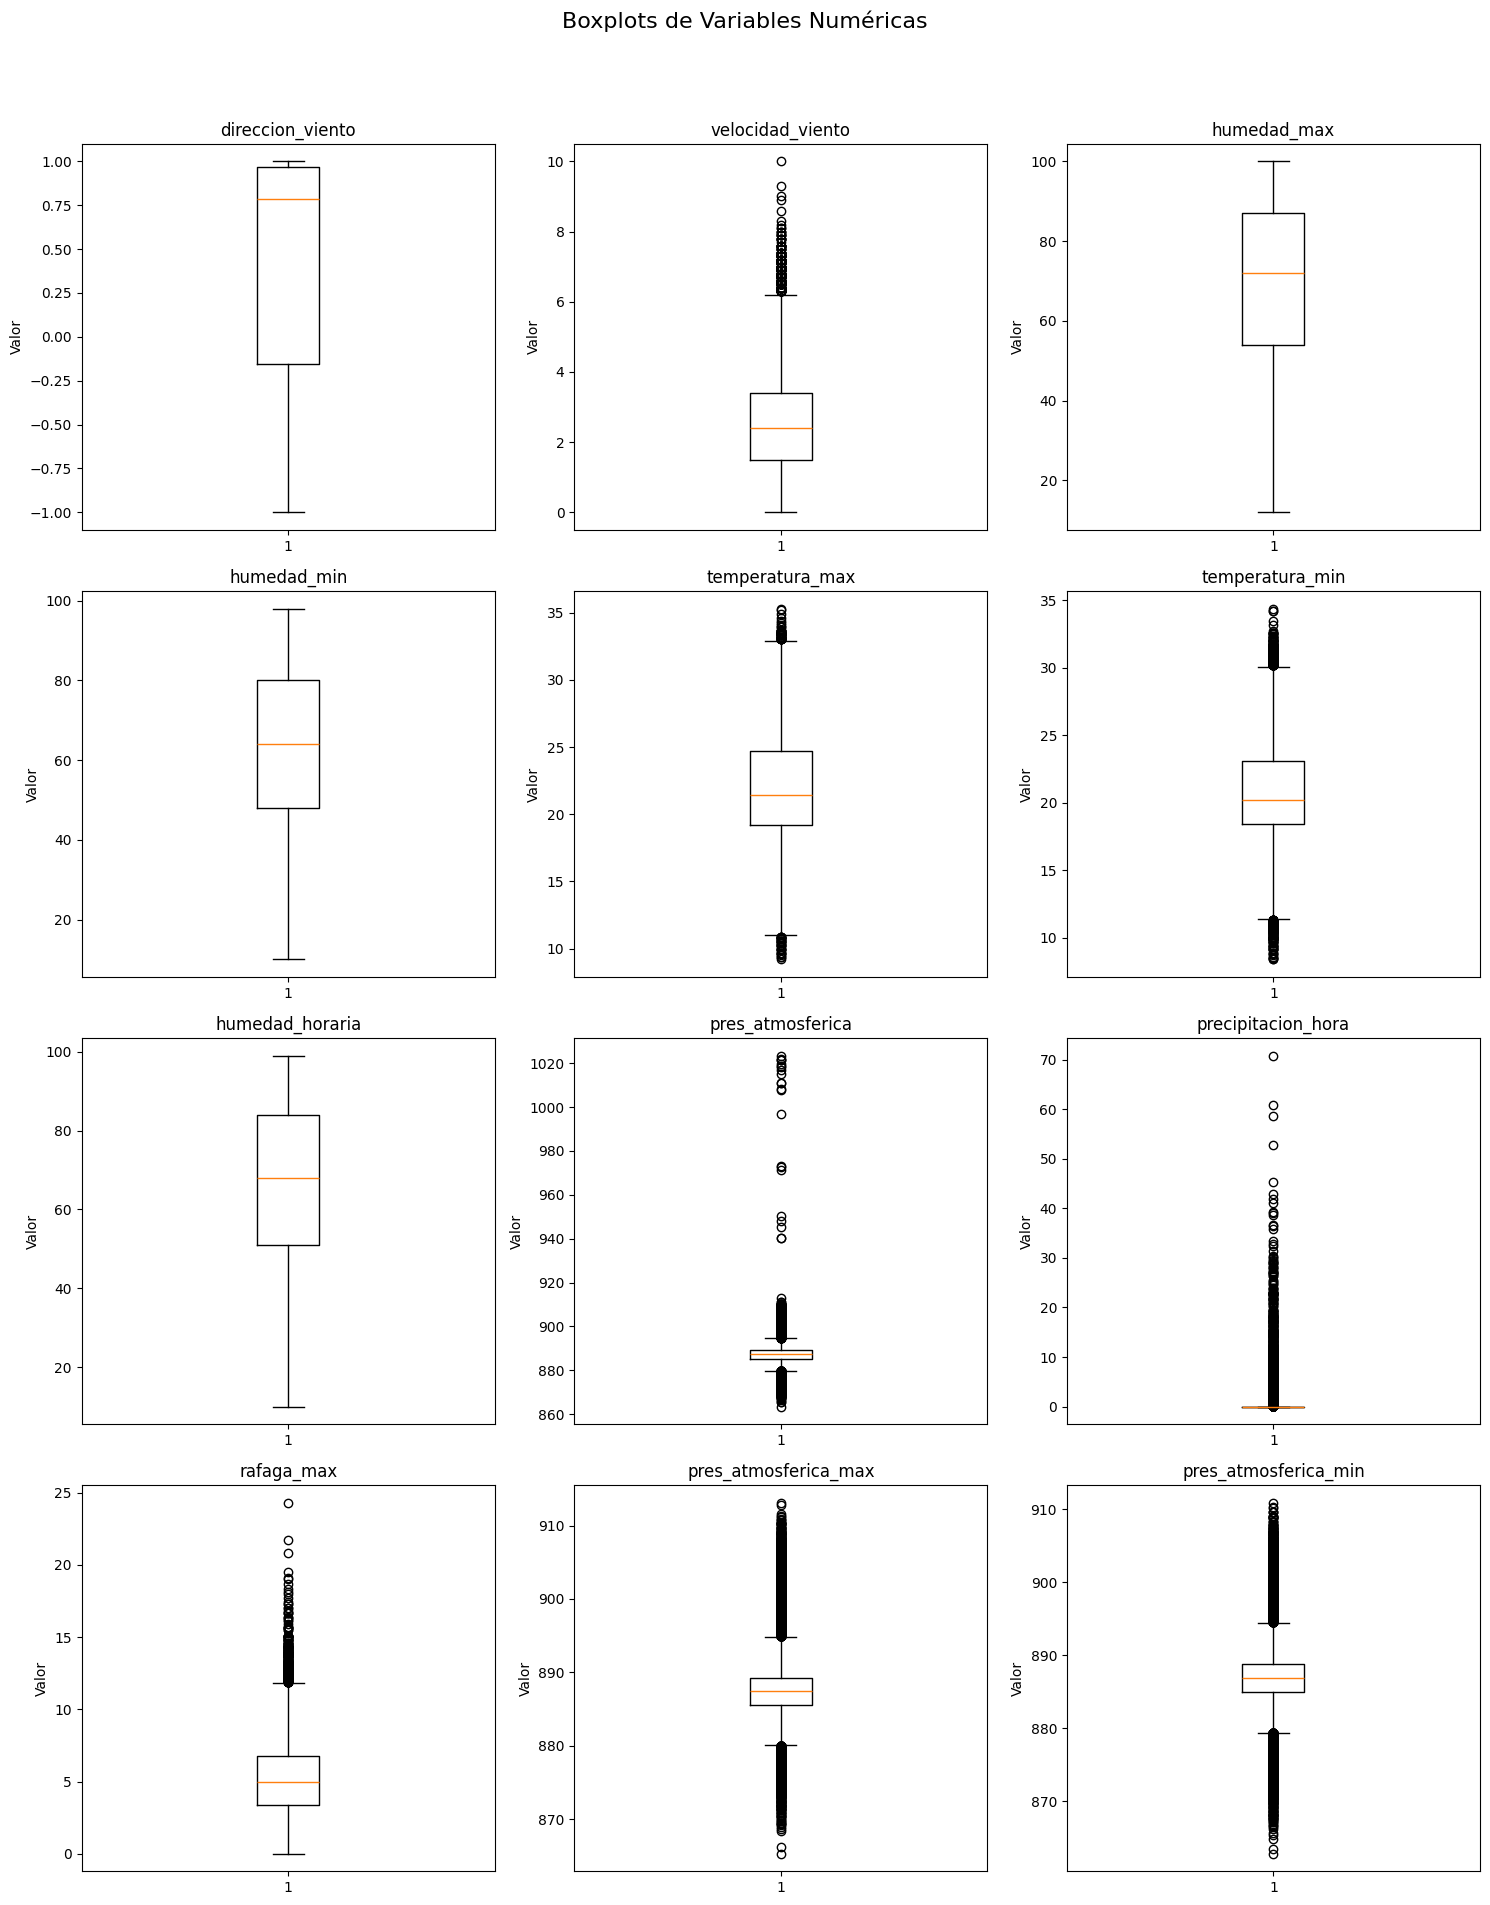

In [67]:
num_cols = wind.select_dtypes(include=[np.number]).columns

n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols)) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*5)) 
fig.suptitle('Boxplots de Variables Numéricas', fontsize=16)

axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(wind[col].dropna())
    axes[i].set_title(col)
    axes[i].set_ylabel('Valor')

for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**direccion_viento:** Este diagrama indica que la mediana de la dirección del viento está cerca del cero. El rango intercuartílico (la caja) es muy pequeño, indicando poca variabilidad en la mayoría de los datos, con algunos valores atípicos.

**velocidad_viento:** La velocidad del viento tiene una mediana relativamente baja y un rango intercuartílico mayor que el de la dirección del viento. Hay varios valores atípicos, que representan velocidades del viento muy altas.

**humedad_max:** La humedad máxima tiene una mediana por encima del 60% y un rango intercuartílico que sugiere una variabilidad moderada, sin valores atípicos visibles.

**humedad_min:** La humedad mínima tiene un rango muy amplio y una mediana cercana al 60%. El rango intercuartílico es amplio, mostrando variabilidad, y hay algunos valores atípicos bajos.

**temperatura_max:** La temperatura máxima muestra una mediana en torno a los 25 grados Celsius, con un rango intercuartílico que indica variabilidad y algunos valores extremos altos.

**temperatura_min:** Similar a la temperatura máxima, la mínima muestra una mediana alrededor de los 15 grados Celsius, con un rango intercuartílico y valores extremos bajos.

**humedad_horaria:** Esta variable muestra una distribución similar a la humedad máxima y mínima, con una mediana por encima del 60% y un rango intercuartílico amplio.

**pres_atmosferica:** La presión atmosférica tiene una mediana muy alta, cerca de los 1000, con un rango intercuartílico estrecho, indicando poca variabilidad, y algunos valores atípicos bajos.

**precipitacion_hora:** La precipitación horaria tiene muchos valores en cero o cercanos a cero, con algunos valores atípicos que representan episodios de lluvia intensa.

**rafaga_max:** La velocidad de ráfaga máxima tiene una mediana baja con varios valores atípicos que muestran episodios de ráfagas muy fuertes.

**pres_atmosferica_max:** La presión atmosférica máxima es consistente con la presión atmosférica general, mostrando una mediana alta y un rango intercuartílico estrecho.

**pres_atmosferica_min:** Similar a la presión atmosférica máxima, la mínima muestra poca variabilidad y una concentración alta de los datos, con algunos valores extremos bajos.

Scatterplot para cada par de variables


In [68]:
x = wind.columns.drop('velocidad_viento')
y = 'velocidad_viento' 

Ahora, analicemos la correlación entre las variables. Para eso observemos la siguiente matriz de correlación:

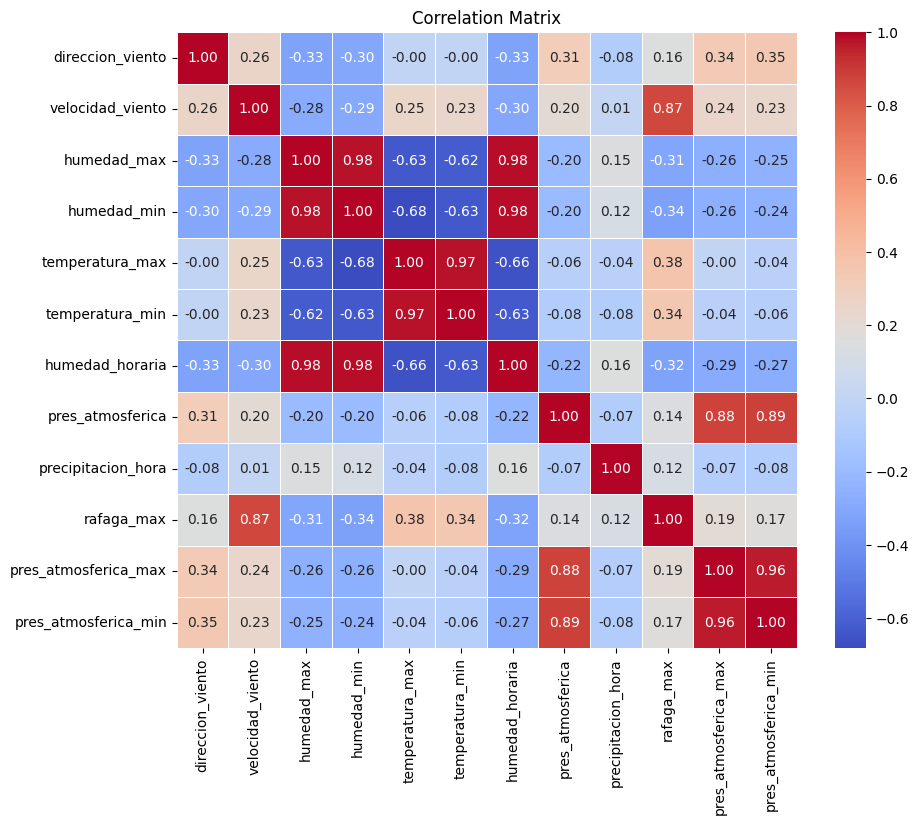

In [69]:
wind_num = wind.drop(columns=['hora'])
correlation_matrix = wind_num.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

Se observa una alta correlación entre variables con características similares como humedad_maxima, humedad_horaria y humedad_minima. Esto sucede de forma similar con las variables relacionadas con la presión atmosférica y temperatura. Esto es esperable ya que son variables que se comportan de forma similar y pueden estar explicando lo mismo. Por otro lado, también se observa una baja-media correlación entre variables con características ambientales distintas como la presión atmosférica y la humedad o la precipitación y la humedad. 

Realicemos la prueba *Variance Inflation Factor (VIF)* para reducir la dimensionalidad de nuestro conjunto de datos y eliminar las columnas altamente correlacionadas.

In [70]:
def VIF_calculation(X):
    VIF = pd.DataFrame()
    VIF["variable"] = X.columns
    VIF["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    VIF = VIF.sort_values('VIF', ascending=False).reset_index(drop = True)
    return(VIF)

def delete_multicollinearity(df, target_name, VIF_threshold):
  X = df.drop(target_name, axis=1)
  VIF_mat = VIF_calculation(X)
  n_VIF = VIF_mat["VIF"][0]
  if (n_VIF <= VIF_threshold):
    print("There is no multicollinearity!")
  else:
    while (n_VIF > VIF_threshold):
      X = X.drop(VIF_mat["variable"][0], axis=1)
      VIF_mat = VIF_calculation(X)
      n_VIF = VIF_mat["VIF"][0]
  display(VIF_mat)
  return X

new_wind = delete_multicollinearity(wind_num, 'velocidad_viento', 10)


variable       VIF
0          rafaga_max  3.678934
1         humedad_min  3.184922
2    direccion_viento  1.389529
3  precipitacion_hora  1.039001

In [71]:
datos_viento = wind[['rafaga_max', 'humedad_min', 'direccion_viento', 'precipitacion_hora']]
datos_viento.to_csv('datos_viento.csv', index=False)

Luego de realizar la prueba *VIF* nos quedan las variables que no muestran signos significativos de multicolinealidad. Veamos como queda la matriz de correlación.

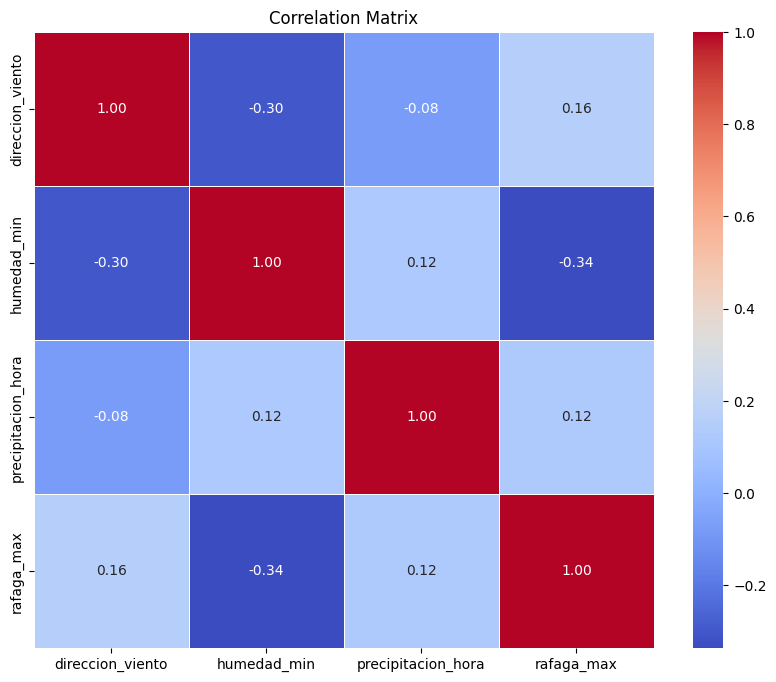

In [72]:
plt.figure(figsize=(10, 8))
sns.heatmap(new_wind.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

Obervamos que ahora los coeficientes de correlación de las variables explicativas son bajos, lo que indica que las variables no explican lo mismo entre si.

Ahora, veamos la distribución de nuestras variables explicativas a través de histogramas

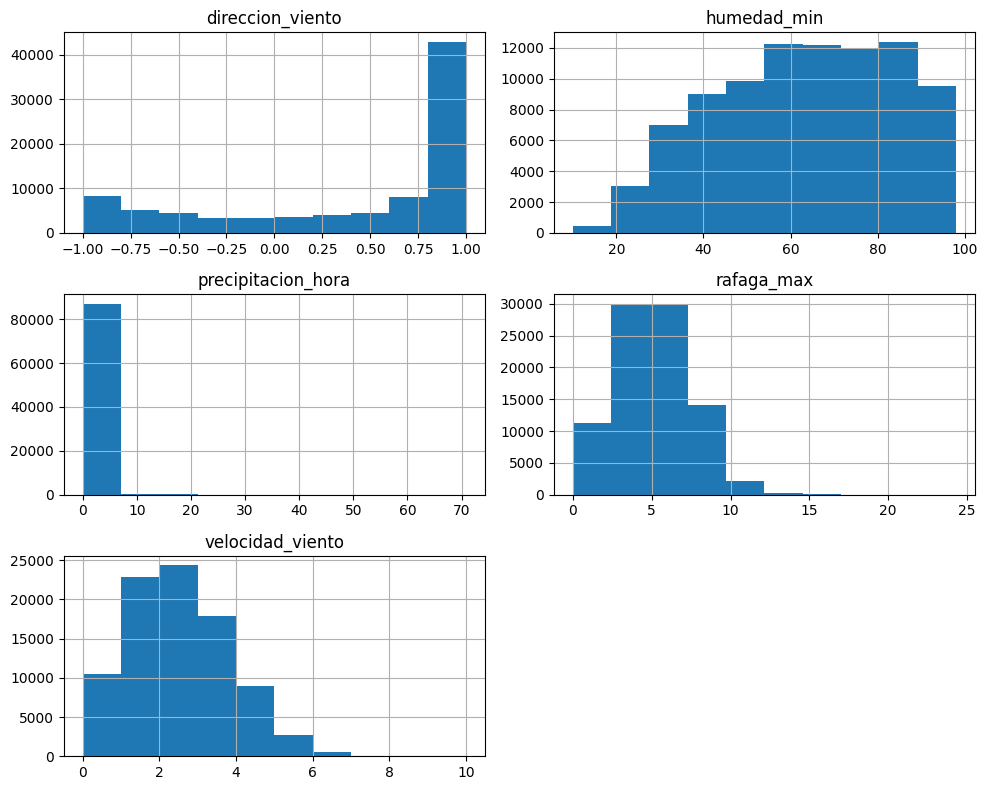

In [73]:
new_wind['velocidad_viento'] = wind['velocidad_viento']
new_wind.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

Observamos que las variables velocidad_viento, rafaga_max y precipitacion_hora presentan una distribución sesgada a la izquierda. Mientras que direccion_viento y humedad_min presentan un sesgo a la derecha. Los datos no están centrados en torno a la media y están dispersos.

### Análisis de series de tiempo

In [74]:
start_date = datetime.date(2010, 1, 1)

def process_hours(hours):
    datetimes = []
    current_date = start_date
    previous_hour = 24 

    for time in hours:
        hour = int(time.split(":")[0])
        if hour < previous_hour:
            if previous_hour != 24: 
                current_date += datetime.timedelta(days=1)
        datetime_obj = datetime.datetime.combine(current_date, datetime.time(hour=hour))
        datetimes.append(datetime_obj)
        previous_hour = hour

    return datetimes

wind['Fecha'] = process_hours(wind['hora'])
wind.head()

hora  direccion_viento  velocidad_viento  humedad_max  humedad_min  \
0  12:00          0.809017               1.8         69.0         60.0   
1  13:00          0.965926               2.7         62.0         55.0   
2  14:00          0.891007               2.0         56.0         50.0   
3  15:00          0.848048               2.5         52.0         44.0   
4  16:00          0.224951               2.4         50.0         43.0   

   temperatura_max  temperatura_min  humedad_horaria  pres_atmosferica  \
0             22.6             20.7             61.0             888.2   
1             24.2             22.5             55.0             888.4   
2             25.5             24.3             51.0             888.1   
3             27.4             25.0             44.0             887.4   
4             27.1             25.5             46.0             886.5   

   precipitacion_hora  rafaga_max  pres_atmosferica_max  pres_atmosferica_min  \
0                 0.0         3.8                 888.2                 887.7   
1                 0.0         4.7                 888.4                 888.2   
2                 0.0         4.9                 888.4                 888.1   
3                 0.0         5.8                 888.1                 887.4   
4                 0.0         5.8                 887.4                 886.5   

                Fecha  
0 2010-01-01 12:00:00  
1 2010-01-01 13:00:00  
2 2010-01-01 14:00:00  
3 2010-01-01 15:00:00  
4 2010-01-01 16:00:00

In [75]:
fig = px.line(wind, x="Fecha", y='velocidad_viento', title='Velocidad del Viento por Hora')
fig.show()

- **Fluctuaciones Constantes:** La velocidad del viento muestra fluctuaciones constantes a lo largo del tiempo, sin una tendencia clara de aumento o disminución a largo plazo.

- **Picos Específicos:** Se observan varios picos que alcanzan o superan las 10 unidades en la escala vertical. Estos picos podrían representar eventos de vientos fuertes específicos, como tormentas o frentes de ráfaga.

- **Variabilidad:** La mayor parte del tiempo, la velocidad del viento parece oscilar entre aproximadamente 4 y 6 unidades, con picos ocasionales que la llevan más allá de estos valores. Esta variabilidad puede ser influenciada por factores estacionales, como mencioné anteriormente, o por cambios en los patrones climáticos locales.

In [76]:
average_wind_speed = wind.groupby('hora')['velocidad_viento'].mean().reset_index()

fig = px.bar(average_wind_speed, x='hora', y='velocidad_viento', title='Promedio de Velocidad del Viento por Hora del Día')
fig.update_layout(xaxis_title='Hora del Día', yaxis_title='Velocidad del Viento Promedio', 
                  xaxis=dict(tickmode='linear'), yaxis=dict(tickmode='linear'))
fig.show()

A partir del gráfico, podemos observar algunas tendencias interesantes en la velocidad del viento a lo largo del día:

- **Períodos de menor velocidad del viento:** Durante las primeras horas del día, desde las 00:00 hasta aproximadamente las 06:00, la velocidad del viento es relativamente baja, con valores que parecen estar generalmente por debajo de 2 en la escala del gráfico.
  
- **Aumento matutino:** A partir de las 07:00, hay un notable aumento en la velocidad del viento, alcanzando un pico alrededor de las 10:00. Esto podría sugerir un patrón común donde el viento se intensifica a medida que el sol calienta la superficie terrestre, disminuyendo la estabilidad atmosférica y permitiendo que el viento se intensifique.
  
- **Máximo en la tarde:** La velocidad del viento sigue siendo alta durante las horas de la tarde, con otro pico pronunciado alrededor de las 15:00. Este comportamiento puede ser típico de áreas donde los procesos térmicos diurnos o los patrones locales de circulación como las brisas marinas o montañosas juegan un papel importante.
  
- **Disminución vespertina y nocturna:** Después de las 18:00, la velocidad del viento comienza a disminuir gradualmente, llegando a niveles más bajos similares a los observados en las primeras horas de la mañana.


c:\Users\USUARIO\miniconda3\envs\proyecto_ml\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning:

'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.



<Figure size 1200x800 with 0 Axes>

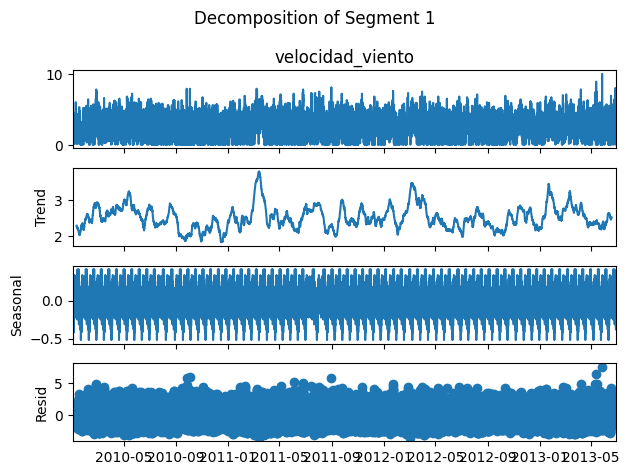

<Figure size 1200x800 with 0 Axes>

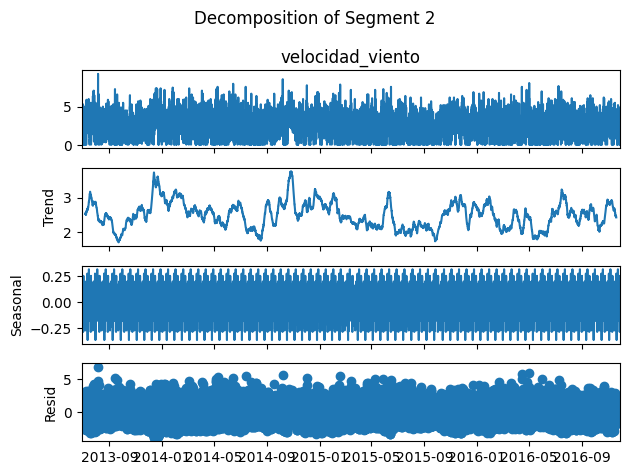

<Figure size 1200x800 with 0 Axes>

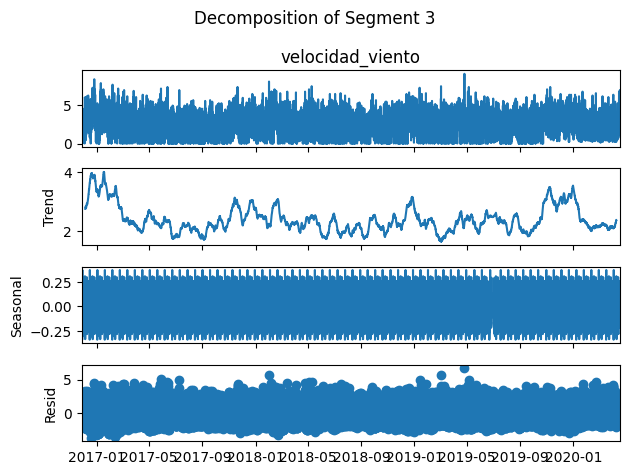

In [77]:
wind['Fecha'] = pd.to_datetime(wind['Fecha'])
wind.set_index('Fecha', inplace=True)

years = (wind.index.max() - wind.index.min()).days / 365.25

segments = np.array_split(wind, 3) 

for i, segment in enumerate(segments):
    period = int((segment.index.max() - segment.index.min()).days / 3)
    result = seasonal_decompose(segment['velocidad_viento'], model='additive', period=max(period, 1))
    
    plt.figure(figsize=(12, 8))
    result.plot()
    plt.suptitle(f'Decomposition of Segment {i+1}')
    plt.tight_layout()
    plt.show()


- **Componente Original:** La serie de tiempo superior muestra los datos originales de la velocidad del viento, que varían entre 0 y 10. Las variaciones son bastante abruptas y frecuentes, lo que es típico para datos meteorológicos como la velocidad del viento.

- **Tendencia:** La segunda gráfica muestra la tendencia de los datos. Aquí observamos que la velocidad del viento tiene fluctuaciones significativas a lo largo del tiempo, con picos y valles que sugieren variaciones estacionales o influencias de patrones climáticos más amplios. La tendencia parece variar principalmente entre 2 y 3.5, indicando que, a pesar de la volatilidad a corto plazo, la velocidad media del viento se mantiene en un rango relativamente estrecho.

- **Estacionalidad:** tiene una periodicidad clara y consistente. Este patrón repetido sugiere que la velocidad del viento es afectada por factores que tienen un ciclo anual regular, lo que podría estar relacionado con cambios estacionales en el clima. La amplitud de la estacionalidad es pequeña (aproximadamente 0.5), lo que indica que, aunque consistente, la influencia estacional no domina completamente la variabilidad de la velocidad del viento.

- **Residuos:** La gráfica de los residuos, es decir, lo que queda después de haber removido los efectos de la tendencia y la estacionalidad. Los residuos parecen ser bastante bajos y consistentemente cercanos a cero, con algunos valores atípicos. Esto es una buena señal de que el modelo de descomposición ha capturado la mayoría de las estructuras de los datos, y los residuos no muestran patrones aparentes que el modelo haya pasado por alto.


## Fraud Detection EDA

Iniciamos cargando los conjunto de datos y observando las primeras observaciones

In [78]:
identity = pd.read_csv('train_identity.csv')
identity.head()

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceType                     DeviceInfo  
0     F     T      T      mobile  SAMSUNG SM-G892A Build/NRD90M  
1     F     F      T      mobile                     iOS Device  
2     F     T      T     desktop                        Windows  
3     F     T      T     desktop                            NaN  
4     F     T      T     desktop                          MacOS  

[5 rows x 41 columns]

In [79]:
identity.shape

(144233, 41)

El dataset cuenta con 41 columnas por 144233 observaciones

In [80]:
transaction = pd.read_csv('train_transaction.csv')
transaction.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN   NaN  
2  NaN   NaN   NaN   NaN  
3  NaN   NaN   NaN   NaN  
4  0.0   0.0   0.0   0.0  

[5 rows x 394 columns]

In [81]:
transaction.shape

(590540, 394)

Se observa que el dataset cuenta con 590540 observaciones con 394 columnas

Ahora analicemos la variable respuesta *isFraud*

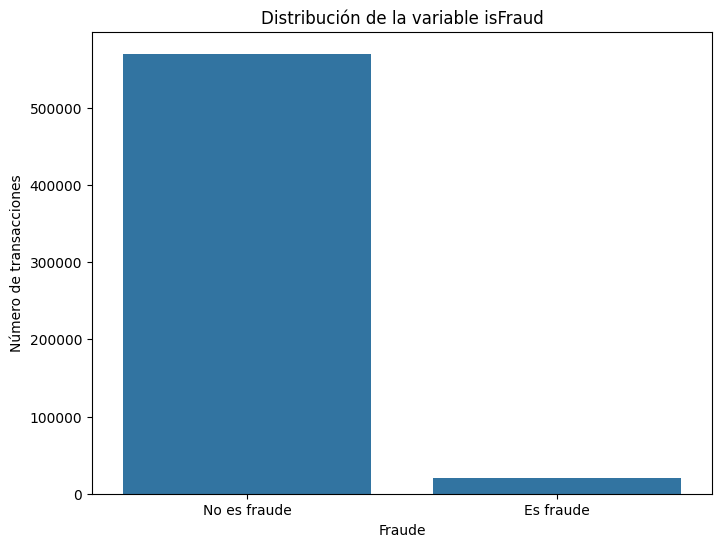

In [82]:
fraude = {0: 'No es fraude', 1: 'Es fraude'}


transaction['mapeo'] = transaction['isFraud'].map(fraude)

plt.figure(figsize=(8, 6))
sns.countplot(x=transaction['mapeo'])
plt.xlabel('Fraude')
plt.ylabel('Número de transacciones')
plt.title('Distribución de la variable isFraud')
plt.show()

Se observa que la mayoría de datos en el datset corresponde a la categoría 'No es fraude', mientras que hay muchos menos datos de la categoría 'Es fraude'. Esto significa que tenemos un conjunto de datos desbalanceados.

Procedamos a ver el tipo de datos de las variables:

In [83]:
identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [84]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 395 entries, TransactionID to mapeo
dtypes: float64(376), int64(4), object(15)
memory usage: 1.7+ GB


Este dataset posee variables tanto numéricas como categóricas. Asimismo, se pueden observar datos faltantes. Más adelante revisaremos este aspecto a detalle. 

A continuación veamos los datos faltantes.

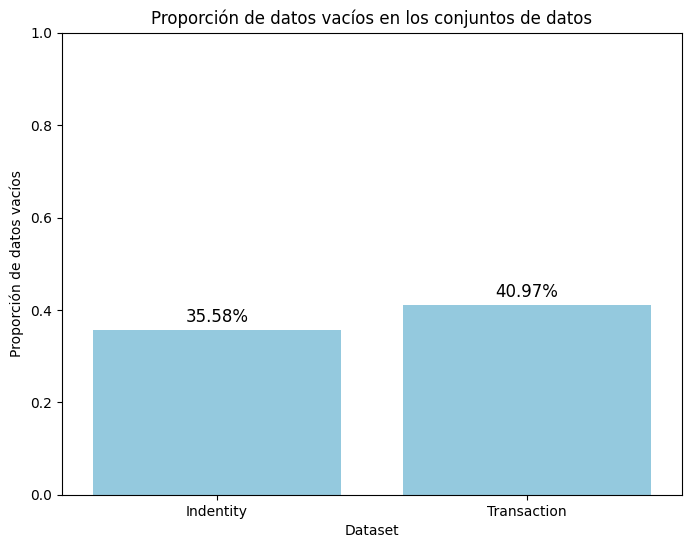

In [85]:
proporcion_datos_vacios_identity = identity.isna().mean()
proporcion_datos_vacios_transaction= transaction.isna().mean()
data = {
    'Dataset': ['Indentity', 'Transaction'],
    'Proporción de datos vacíos': [proporcion_datos_vacios_identity.mean(), proporcion_datos_vacios_transaction.mean()]
}

df_proporcion_vacios = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Dataset', y='Proporción de datos vacíos', data=df_proporcion_vacios, color='skyblue')
plt.title('Proporción de datos vacíos en los conjuntos de datos')
plt.ylim(0, 1)  

for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

Veamos los datos faltantes por columna de cada dataset

In [86]:
datos_faltantes = identity.isna().sum()
porcentaje_faltante = (datos_faltantes / len(identity)) * 100
print(porcentaje_faltante)

TransactionID     0.000000
id_01             0.000000
id_02             2.330257
id_03            54.016071
id_04            54.016071
id_05             5.108401
id_06             5.108401
id_07            96.425922
id_08            96.425922
id_09            48.052110
id_10            48.052110
id_11             2.256765
id_12             0.000000
id_13            11.726165
id_14            44.503685
id_15             2.251912
id_16            10.325654
id_17             3.372321
id_18            68.722137
id_19             3.407681
id_20             3.447200
id_21            96.423149
id_22            96.416215
id_23            96.416215
id_24            96.708798
id_25            96.441868
id_26            96.420375
id_27            96.416215
id_28             2.256765
id_29             2.256765
id_30            46.222432
id_31             2.739318
id_32            46.207872
id_33            49.187079
id_34            46.056034
id_35             2.251912
id_36             2.251912
i

In [87]:
datos_faltantes = transaction.isna().sum()
porcentaje_faltante = (datos_faltantes / len(transaction)) * 100
print(porcentaje_faltante)

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
V336              86.054967
V337              86.054967
V338              86.054967
V339              86.054967
mapeo              0.000000
Length: 395, dtype: float64


En ambos dataset la mayoría de columnas tienen un porcentaje significativo de datos faltantes.

Veamos un análisis general de las variables por grupo.

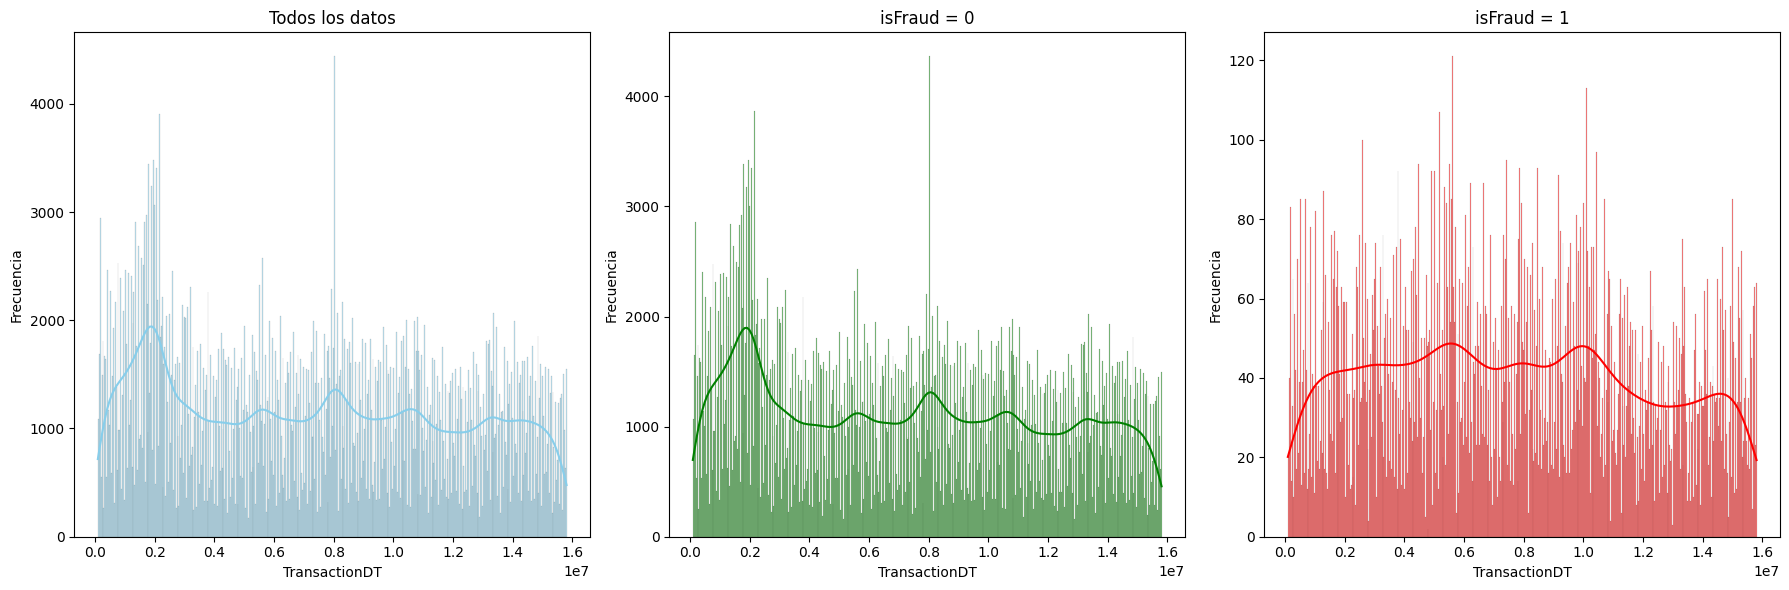

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograma con todos los datos
sns.histplot(transaction["TransactionDT"], bins=500, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Todos los datos')
axes[0].set_xlabel('TransactionDT')
axes[0].set_ylabel('Frecuencia')

# Histograma donde la columna isFraud = 0
sns.histplot(transaction[transaction['mapeo'] == 'No es fraude']["TransactionDT"], bins=500, kde=True, color='green', ax=axes[1])
axes[1].set_title('isFraud = 0')
axes[1].set_xlabel('TransactionDT')
axes[1].set_ylabel('Frecuencia')

# Histograma donde la columna isFraud = 1
sns.histplot(transaction[transaction['mapeo'] == 'Es fraude']["TransactionDT"], bins=500, kde=True, color='red', ax=axes[2])
axes[2].set_title('isFraud = 1')
axes[2].set_xlabel('TransactionDT')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()  
plt.show()


1. **Todos los datos:** Hay picos claros y valles que sugieren patrones temporales o cíclicos en los datos. Estos podrían corresponder a horarios de alta actividad como las horas del día o días específicos de la semana.

2. **isFraud = 0:** Este sigue un patrón similar al del gráfico de todos los datos, lo que tiene sentido ya que las transacciones legítimas constituyen la mayoría de los datos y, por lo tanto, dominan el patrón general observado.

3. **isFraud = 1:** La escala del eje y es mucho menor en comparación con los otros dos gráficos, lo que refleja la menor frecuencia de casos de fraude en el conjunto de datos. Los picos aquí parecen menos pronunciados y el patrón temporal puede diferir del de las transacciones legítimas. 

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18364\2327863681.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18364\2327863681.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18364\2327863681.py:7: UserWarning:



`distpl

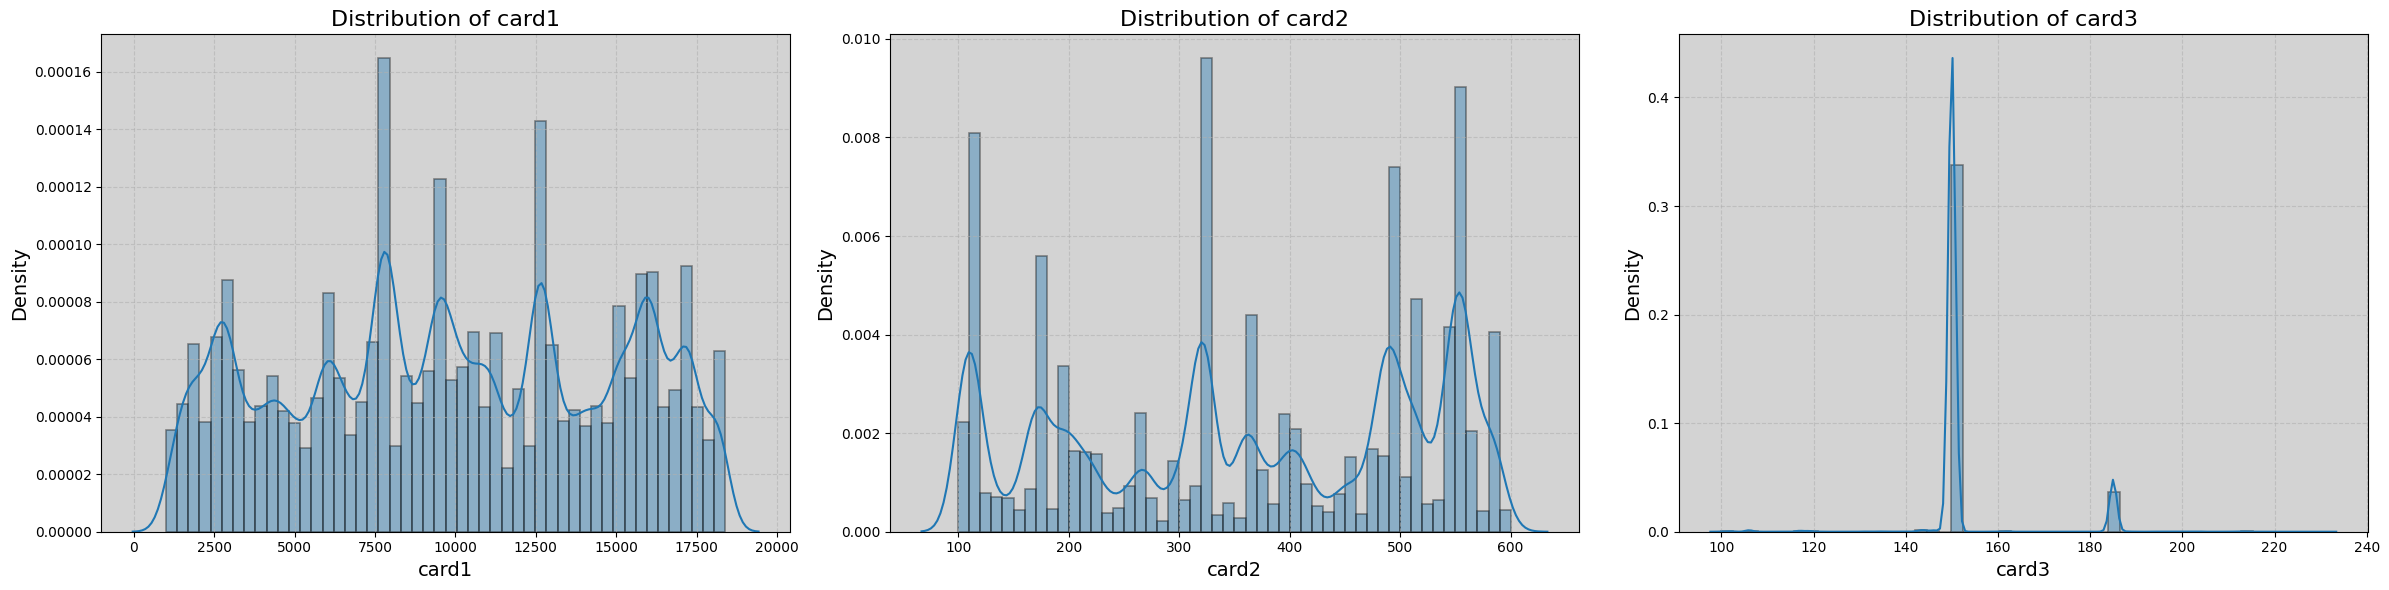

In [89]:
card= [f"card{i}" for i in range(1,7)]
cards=transaction[card]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

for i in range(0, 3):
    sns.distplot(cards.iloc[:, i], bins=50, ax=axes[i], hist_kws={'edgecolor': 'black', 'linewidth': 1.2}, kde= True)

    axes[i].set_title('Distribution of ' + cards.iloc[:, i].name, fontsize=16)
    axes[i].set_xlabel(cards.iloc[:, i].name, fontsize=14)
    axes[i].set_ylabel('Density', fontsize=14)

    axes[i].grid(True, linestyle='--', alpha=0.6)

    axes[i].set_facecolor('lightgray')

plt.tight_layout()
plt.show()


**Distribución de card1:** Este histograma muestra una distribución bastante uniforme con múltiples picos, lo que indica que los valores para la card1 están distribuidos a lo largo de un amplio rango de cantidades. Hay varios picos notables que sugieren que ciertas cantidades ocurren con más frecuencia que otras.

**Distribución de card2:** El histograma para la card2 revela una distribución más irregular con varios picos agudos, lo que podría sugerir que hay cantidades de transacciones que son muy populares y posiblemente algunas cantidades que son menos comunes.

**Distribución de card3:** El histograma para la card3 es bastante diferente de los dos primeros. Muestra un pico muy fuerte en un valor particular, lo que podría implicar que la mayoría de las transacciones para la card3 son de una cantidad única, con muy pocas transacciones de otras cantidades. Hay un pico más pequeño en un valor más alto también, indicando una cantidad común secundaria, pero es mucho menos frecuente que la principal.


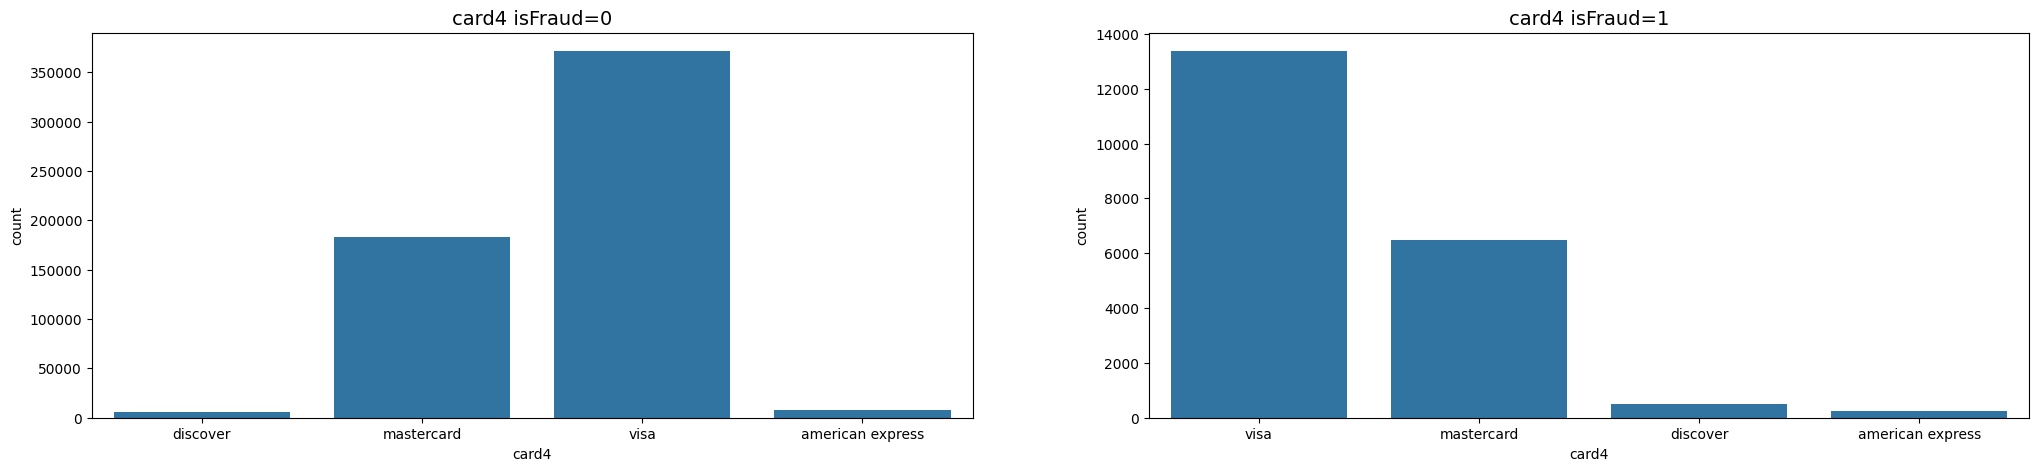

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(25,5))

sns.countplot(x="card4", ax=ax[0], data=transaction.loc[transaction['mapeo'] == "No es fraude"])
ax[0].set_title('card4 isFraud=0', fontsize=14)
sns.countplot(x="card4", ax=ax[1], data=transaction.loc[transaction['mapeo'] == "Es fraude"])
ax[1].set_title('card4 isFraud=1', fontsize=14)
plt.show()

**card4 isFraud=0:** Este diagrama muestra que las transacciones no fraudulentas están dominadas por Visa, seguida por Mastercard, y luego Discover, con American Express siendo la menos utilizada entre las presentadas. La barra de Visa es significativamente más alta que las demás, lo que indica una gran cantidad de transacciones legítimas con tarjetas Visa.

**card4 isFraud=1:** Visa y Mastercard son considerablemente más altas que Discover y American Express, lo cual indica que la mayoría de las transacciones fraudulentas se realizaron con Visa y Mastercard.


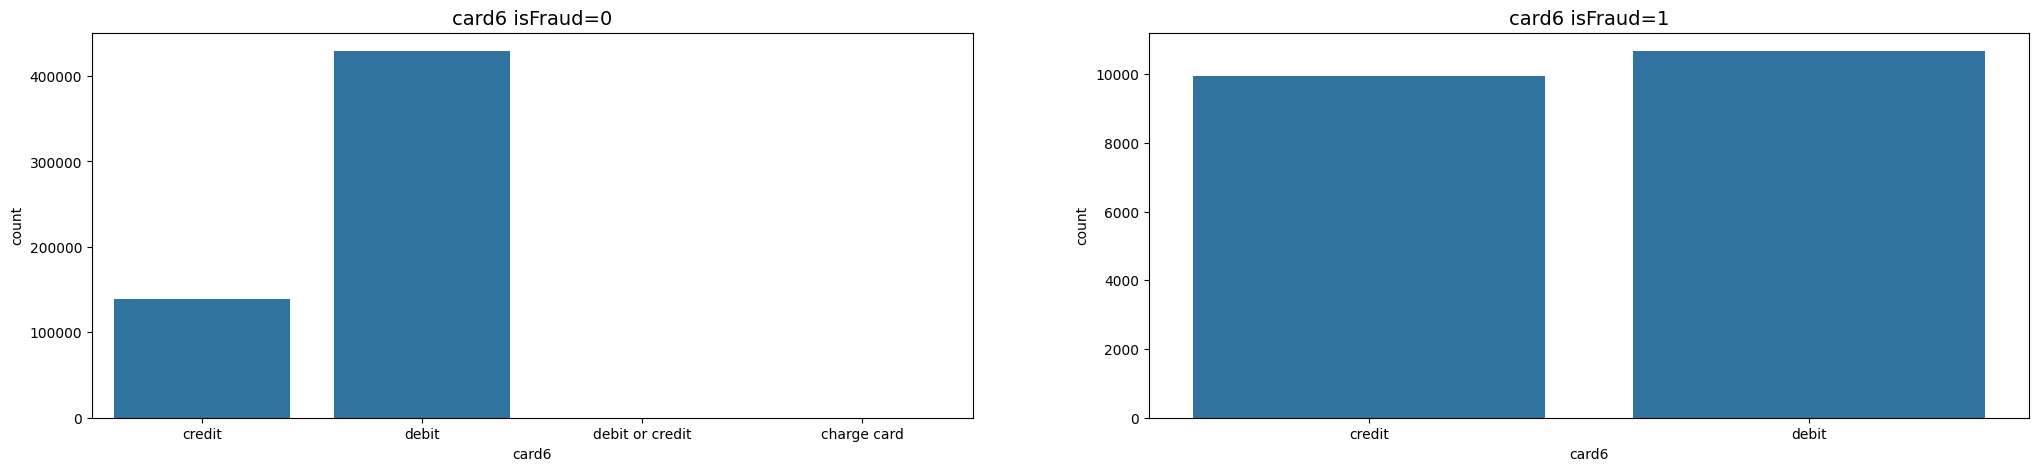

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(25,5))

sns.countplot(x="card6", ax=ax[0], data=transaction.loc[transaction['mapeo'] == "No es fraude"])
ax[0].set_title('card6 isFraud=0', fontsize=14)
sns.countplot(x="card6", ax=ax[1], data=transaction.loc[transaction['mapeo'] == "Es fraude"])
ax[1].set_title('card6 isFraud=1', fontsize=14)
plt.show()

**card6 isFraud=0:** En el primer gráfico, se muestra que la mayoría de las transacciones no fraudulentas se realizan con tarjetas de débito, seguidas por las de crédito. La categoría "debit or credit" y "charge card" tienen una representación mucho menor. Esto sugiere que las tarjetas de débito son mucho más utilizadas para transacciones legítimas en este conjunto de datos.

**card6 isFraud=1:** El segundo gráfico, que representa las transacciones marcadas como fraudulentas, muestra un patrón similar con la mayoría de las transacciones fraudulentas realizadas con tarjetas de débito. Las tarjetas de crédito también tienen una participación significativa en el fraude, aunque ligeramente menor que las de débito.

## Selección de Variables (Transaction)

Iniciareemos eliminando aquellas columnas con más de 50% de datos nulos.

In [92]:
def eliminar_columnas_nulos(df, porcentaje_umbral=0.5):
    num_min_no_nulos = len(df) * porcentaje_umbral
    df_filtrado = df.dropna(axis=1, thresh=num_min_no_nulos)
    return df_filtrado

identity = eliminar_columnas_nulos(identity, 0.5)
transaction = eliminar_columnas_nulos(transaction, 0.5)

print("Variables Identity",identity.columns)
print("Variables Transaction", transaction.columns)
transaction.shape[1]

Variables Identity Index(['TransactionID', 'id_01', 'id_02', 'id_05', 'id_06', 'id_09', 'id_10',
       'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_19',
       'id_20', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34',
       'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')
Variables Transaction Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321',
       'mapeo'],
      dtype='object', length=221)


221

Estas son las columnas que quedaron luego de eliminar las variables con más del 50% de datos faltantes.


### Variables C y D

Variables numéricas que empiezan por 'D': ['D1', 'D2', 'D3', 'D4', 'D10', 'D11', 'D15']


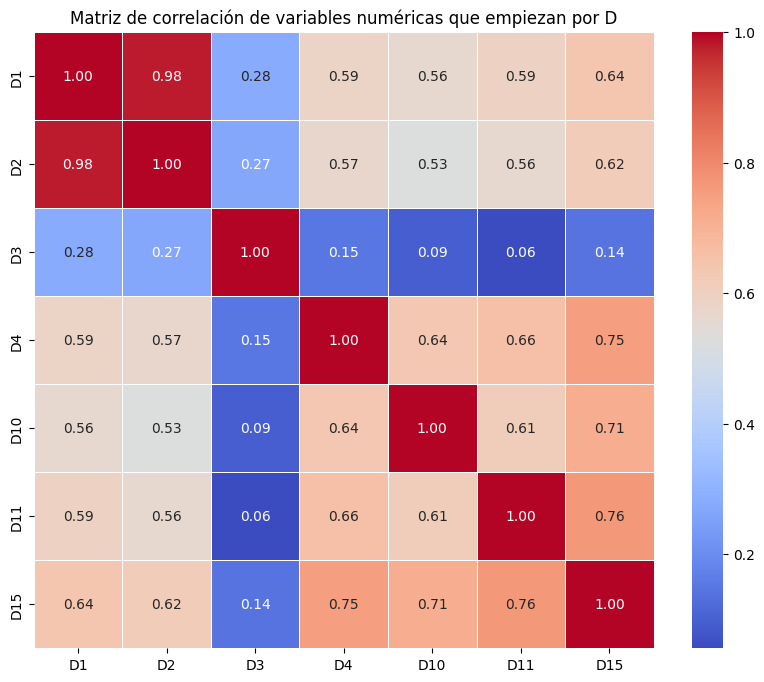

No hay variables categóricas que empiecen por 'D'.


In [93]:
numeric_vars_with_d = [col for col in transaction.select_dtypes(include=['number']).columns if col.startswith('D')]
if numeric_vars_with_d:
    print("Variables numéricas que empiezan por 'D':", numeric_vars_with_d)
    transaction_d = transaction[numeric_vars_with_d]
    correlacion = transaction_d.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de correlación de variables numéricas que empiezan por D')
    plt.show()
else:
    print("No hay variables numéricas que empiecen por 'D'.")

categorical_vars_with_d = [col for col in transaction.select_dtypes(include=['object']).columns if col.startswith('D')]
if categorical_vars_with_d:
    print("Variables categóricas que empiezan por 'D':", categorical_vars_with_d)
else:
    print("No hay variables categóricas que empiecen por 'D'.")


Seleccionamos las columnas que tengan la menor correlación entre ellas para evitar la colinealidad. Estas son: *D3, D4, D11* y eliminamos el resto de variables que empiecen por *D*.

In [94]:
columnas_a_mantener = ['D3', 'D4', 'D11']
columnas_a_eliminar = [columna for columna in transaction.columns if columna.startswith('D') and columna not in columnas_a_mantener]

transaction = transaction.drop(columnas_a_eliminar, axis=1)

Ahora hagamos el mismo procedimiento con las variables que empiecen por *C*.

Variables numéricas que empiezan por 'C': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']


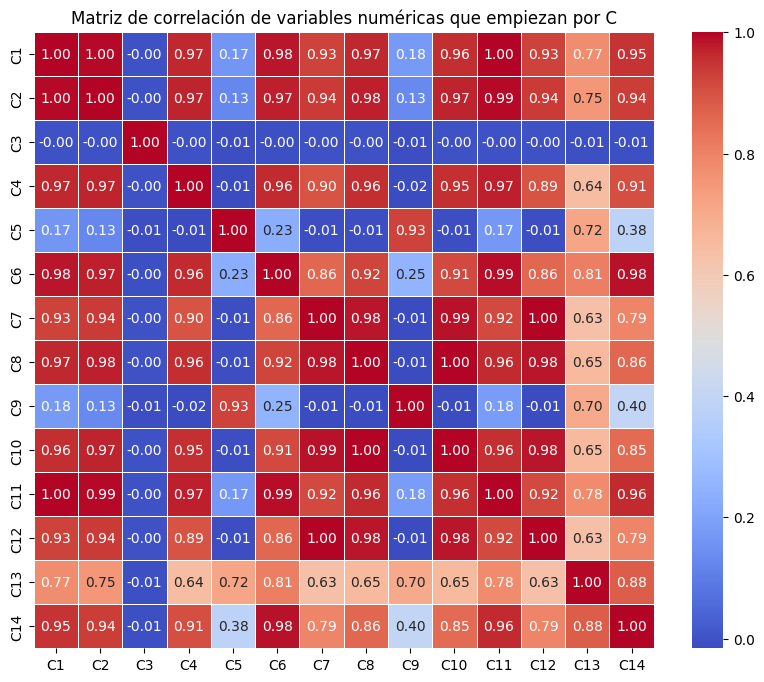

No hay variables categóricas que empiecen por 'C'.


In [95]:
numeric_vars_with_d = [col for col in transaction.select_dtypes(include=['number']).columns if col.startswith('C')]
if numeric_vars_with_d:
    print("Variables numéricas que empiezan por 'C':", numeric_vars_with_d)
    transaction_d = transaction[numeric_vars_with_d]
    correlacion = transaction_d.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de correlación de variables numéricas que empiezan por C')
    plt.show()
else:
    print("No hay variables numéricas que empiecen por 'C'.")

categorical_vars_with_d = [col for col in transaction.select_dtypes(include=['object']).columns if col.startswith('C')]
if categorical_vars_with_d:
    print("Variables categóricas que empiezan por 'C':", categorical_vars_with_d)
else:
    print("No hay variables categóricas que empiecen por 'C'.")


Al igual que en el caso anterior se seleccionan las variables que tengan la menos correlación entre ellas. Seleccionamos las columnas *C3, C5* y eliminamos las otras del dataset.

In [96]:
columnas_a_mantener = ['C3', 'C5']
columnas_a_eliminar = [columna for columna in transaction.columns if columna.startswith('C') and columna not in columnas_a_mantener]

transaction = transaction.drop(columnas_a_eliminar, axis=1)

### Variables Card

Ahora revisemos los coeficientes de correlación de las variables numéricas que inicien con 'card'.

Variables numéricas que empiezan por 'card': ['card1', 'card2', 'card3', 'card5']


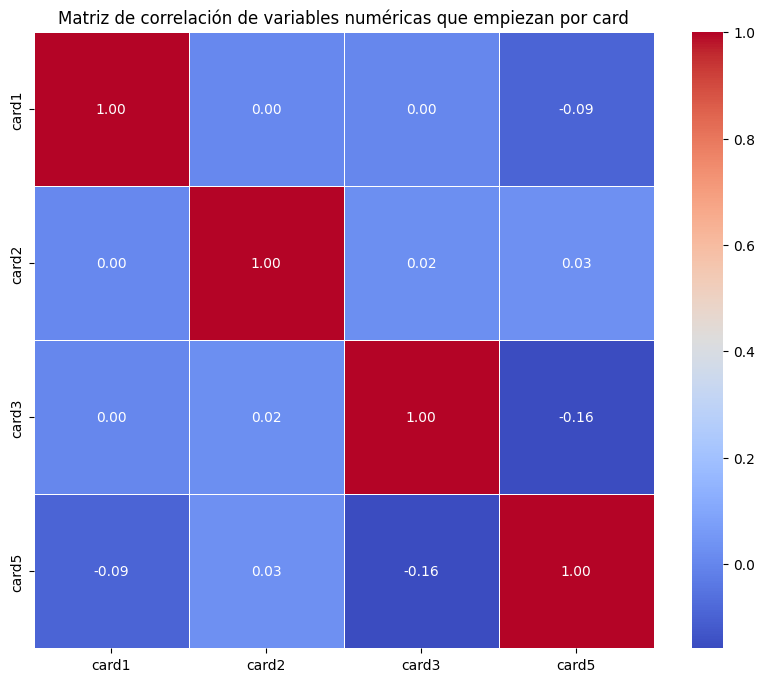

Variables categóricas que empiezan por 'card': ['card4', 'card6']
Prueba Chi-Cuadrado
Columnas mantenidas: []
No se mantuvo ninguna columna.


In [97]:
numeric_vars_with_card = [col for col in transaction.select_dtypes(include=['number']).columns if col.startswith('card')]
if numeric_vars_with_card:
    print("Variables numéricas que empiezan por 'card':", numeric_vars_with_card)
    transaction_card = transaction[numeric_vars_with_card]
    correlacion = transaction_card.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de correlación de variables numéricas que empiezan por card')
    plt.show()
else:
    print("No hay variables numéricas que empiecen por 'card'.")

categorical_vars_with_card = [col for col in transaction.select_dtypes(include=['object']).columns if col.startswith('card')]
if categorical_vars_with_card:
    print("Variables categóricas que empiezan por 'card':", categorical_vars_with_card)

    print('Prueba Chi-Cuadrado')
    columns_to_keep = []
    for col1 in categorical_vars_with_card:
        is_independent = True
        for col2 in categorical_vars_with_card:
            if col1 != col2:
                contingency_table = pd.crosstab(transaction[col1], transaction[col2])
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                if p < 0.05:
                    is_independent = False
                    break
        if is_independent:
            columns_to_keep.append(col1)

    df_reduced = transaction[columns_to_keep]
    print("Columnas mantenidas:", columns_to_keep)
    if not columns_to_keep:
        print("No se mantuvo ninguna columna.")
    else:
        print(df_reduced.head())
else:
    print("No hay variables categóricas que empiecen por 'card'.")


Con este conjunto de variables podemos observar que en general tienen baja correlación entre ellas, por lo que se escogeremos las siguientes: *card2, card3* y eliminamos el resto.

In [98]:
columnas_a_mantener = ['card2', 'card3']
columnas_a_eliminar = [columna for columna in transaction.columns if columna.startswith('card') and columna not in columnas_a_mantener]

transaction = transaction.drop(columnas_a_eliminar, axis=1)

### Variables M

Revisemos las variables numéricas que empiezan por M.

In [99]:
df_numeric = transaction.select_dtypes(include=['number'])
columnas_con_M = [columna for columna in df_numeric.columns if columna.startswith('M')]
print(columnas_con_M)

[]


Como podemos ver no hay variables numéricas que empiezan por M. Así que aplicaremos la prueba Chi-cuadrado a las variables categóricas.

In [100]:
transaction_category = transaction.select_dtypes(include=['object'])
columnas_con_m = [columna for columna in transaction_category.columns if columna.startswith('M')]
transaction_m = transaction_category[columnas_con_m]
print(transaction_m)

columns_to_keep = []

for col1 in transaction_m.columns:
    is_independent = True
    for col2 in transaction_m.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(transaction_m[col1], transaction_m[col2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            if p < 0.05:
                is_independent = False
                break
    if is_independent:
        columns_to_keep.append(col1)
df_reduced = transaction_m[columns_to_keep]
print("Columnas mantenidas:", columns_to_keep)
print(df_reduced.head())

         M1   M2   M3   M4   M6
0         T    T    T   M2    T
1       NaN  NaN  NaN   M0    T
2         T    T    T   M0    F
3       NaN  NaN  NaN   M0    F
4       NaN  NaN  NaN  NaN  NaN
...     ...  ...  ...  ...  ...
590535    T    T    T   M0    F
590536    T    F    F   M0    T
590537    T    F    F  NaN    T
590538    T    T    T   M0    T
590539    T    F    F  NaN    T

[590540 rows x 5 columns]
Columnas mantenidas: []
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


Ninguna variable pasó la prueba Chi-cuadrado, esto significa que son dependientes.

### Variables Product

Una vez más realizamos el mismo procedimiento pero en este caso analizaremos las variables que inician por 'Product'

In [104]:
numeric_vars_with_d = [col for col in transaction.select_dtypes(include=['number']).columns if col.startswith('ProductCD')]
if numeric_vars_with_d:
    print("Variables numéricas que empiezan por 'ProductCD_':", numeric_vars_with_d)
    transaction_d = transaction[numeric_vars_with_d]
    correlacion = transaction_d.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de correlación de variables numéricas que empiezan por ProductCD_')
    plt.show()
else:
    print("No hay variables numéricas que empiecen por 'ProductCD_'.")

categorical_vars_with_d = [col for col in transaction.select_dtypes(include=['object']).columns if col.startswith('ProductCD_')]
if categorical_vars_with_d:
    print("Variables categóricas que empiezan por 'ProductCD_':", categorical_vars_with_d)
else:
    print("No hay variables categóricas que empiecen por 'ProductCD_'.")


No hay variables numéricas que empiecen por 'ProductCD_'.
No hay variables categóricas que empiecen por 'ProductCD_'.


Luego de hacer la anterior selección de variables el dataset resultante sería:

In [105]:
final_transaction = transaction[['isFraud', 'TransactionID','TransactionDT', 'TransactionAmt',  'card2', 'card3', 
                                 'C3', 'C5', 'D3', 'D4', 'D11']]
final_transaction

isFraud  TransactionID  TransactionDT  TransactionAmt  card2  card3  \
0             0        2987000          86400           68.50    NaN  150.0   
1             0        2987001          86401           29.00  404.0  150.0   
2             0        2987002          86469           59.00  490.0  150.0   
3             0        2987003          86499           50.00  567.0  150.0   
4             0        2987004          86506           50.00  514.0  150.0   
...         ...            ...            ...             ...    ...    ...   
590535        0        3577535       15811047           49.00    NaN  150.0   
590536        0        3577536       15811049           39.50  225.0  150.0   
590537        0        3577537       15811079           30.95  595.0  150.0   
590538        0        3577538       15811088          117.00  481.0  150.0   
590539        0        3577539       15811131          279.95  170.0  150.0   

         C3   C5    D3    D4    D11  
0       0.0  0.0  13.0   NaN   13.0  
1       0.0  0.0   NaN   0.0    NaN  
2       0.0  0.0   NaN   0.0  315.0  
3       0.0  0.0   0.0  94.0    NaN  
4       0.0  0.0   NaN   NaN    NaN  
...     ...  ...   ...   ...    ...  
590535  0.0  1.0  30.0   NaN   56.0  
590536  0.0  0.0   NaN   0.0    0.0  
590537  0.0  1.0   NaN   0.0    0.0  
590538  0.0  0.0   0.0  22.0   22.0  
590539  0.0  1.0   0.0   1.0    0.0  

[590540 rows x 11 columns]

### One hot encoder 

In [106]:
#Dataset Identity
data1_string = identity.select_dtypes(include=['object'])
encoder1 = OneHotEncoder()
data1_encoded = encoder1.fit_transform(data1_string)
data1_encoded_df = pd.DataFrame(data1_encoded.toarray(), columns=encoder1.get_feature_names_out(data1_string.columns))
identity = pd.concat([identity.drop(columns=data1_string.columns), data1_encoded_df], axis=1)

#Dataset Transaction
data2_string = final_transaction.select_dtypes(include=['object'])
encoder2 = OneHotEncoder()
data2_encoded = encoder2.fit_transform(data2_string)
data2_encoded_df = pd.DataFrame(data2_encoded.toarray(), columns=encoder2.get_feature_names_out(data2_string.columns))
final_transaction = pd.concat([final_transaction.drop(columns=data2_string.columns), data2_encoded_df], axis=1)

Antes de realizar la prueba *VIF* realicemos la imputación de datos.

In [107]:
#imputación datos categoricos por dato mas frecuente
identity = identity.apply(lambda x: x.fillna(x.value_counts().index[0]) if x.dtype == 'O' else x)
final_transaction = final_transaction.apply(lambda x: x.fillna(x.value_counts().index[0]) if x.dtype == 'O' else x)

#imputar con la mediana
identity = identity.fillna(identity.median())
final_transaction = final_transaction.fillna(final_transaction.median())

Por último realicemos la prueba *VIF* para asegurarnos que no haya multicolinelidad entre las variables explicativas.

In [108]:
def VIF_calculation(X):
    """ Calcula el VIF para cada variable en el DataFrame X. """
    VIF_data = pd.DataFrame()
    VIF_data["variable"] = X.columns
    VIF_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return VIF_data

def delete_multicollinearity(df, target_name, VIF_threshold):
    X = df.drop(target_name, axis=1)
    VIF_mat = VIF_calculation(X)
    while any(VIF_mat["VIF"] > VIF_threshold):
        highest_VIF = VIF_mat[VIF_mat["VIF"] > VIF_threshold].max()
        X = X.drop(highest_VIF["variable"], axis=1)
        VIF_mat = VIF_calculation(X)
    X[target_name] = df[target_name]

    display(VIF_mat)
    return X

final_transaction = delete_multicollinearity(final_transaction, 'isFraud', 10)


variable       VIF
0   TransactionDT  2.796712
1  TransactionAmt  1.283763
2           card2  2.768351
3              C3  1.001665
4              C5  1.074234
5              D3  1.194289
6              D4  1.838342
7             D11  1.929782

Luego de realizar el VIF, tenemos las variables con las cuales no presenta multicolinealidad.

## Análisis Gráfico de los datos
Para realizar este análisis se considerarán las siguientes variables:
TransactionDT, TransactionAmt, C5, isFraud, card2, M1_F, D11, M6_T, D3

In [109]:
data = final_transaction[['TransactionDT', 'TransactionAmt', 'C5', 'isFraud', 'card2','D11', 'D3']]

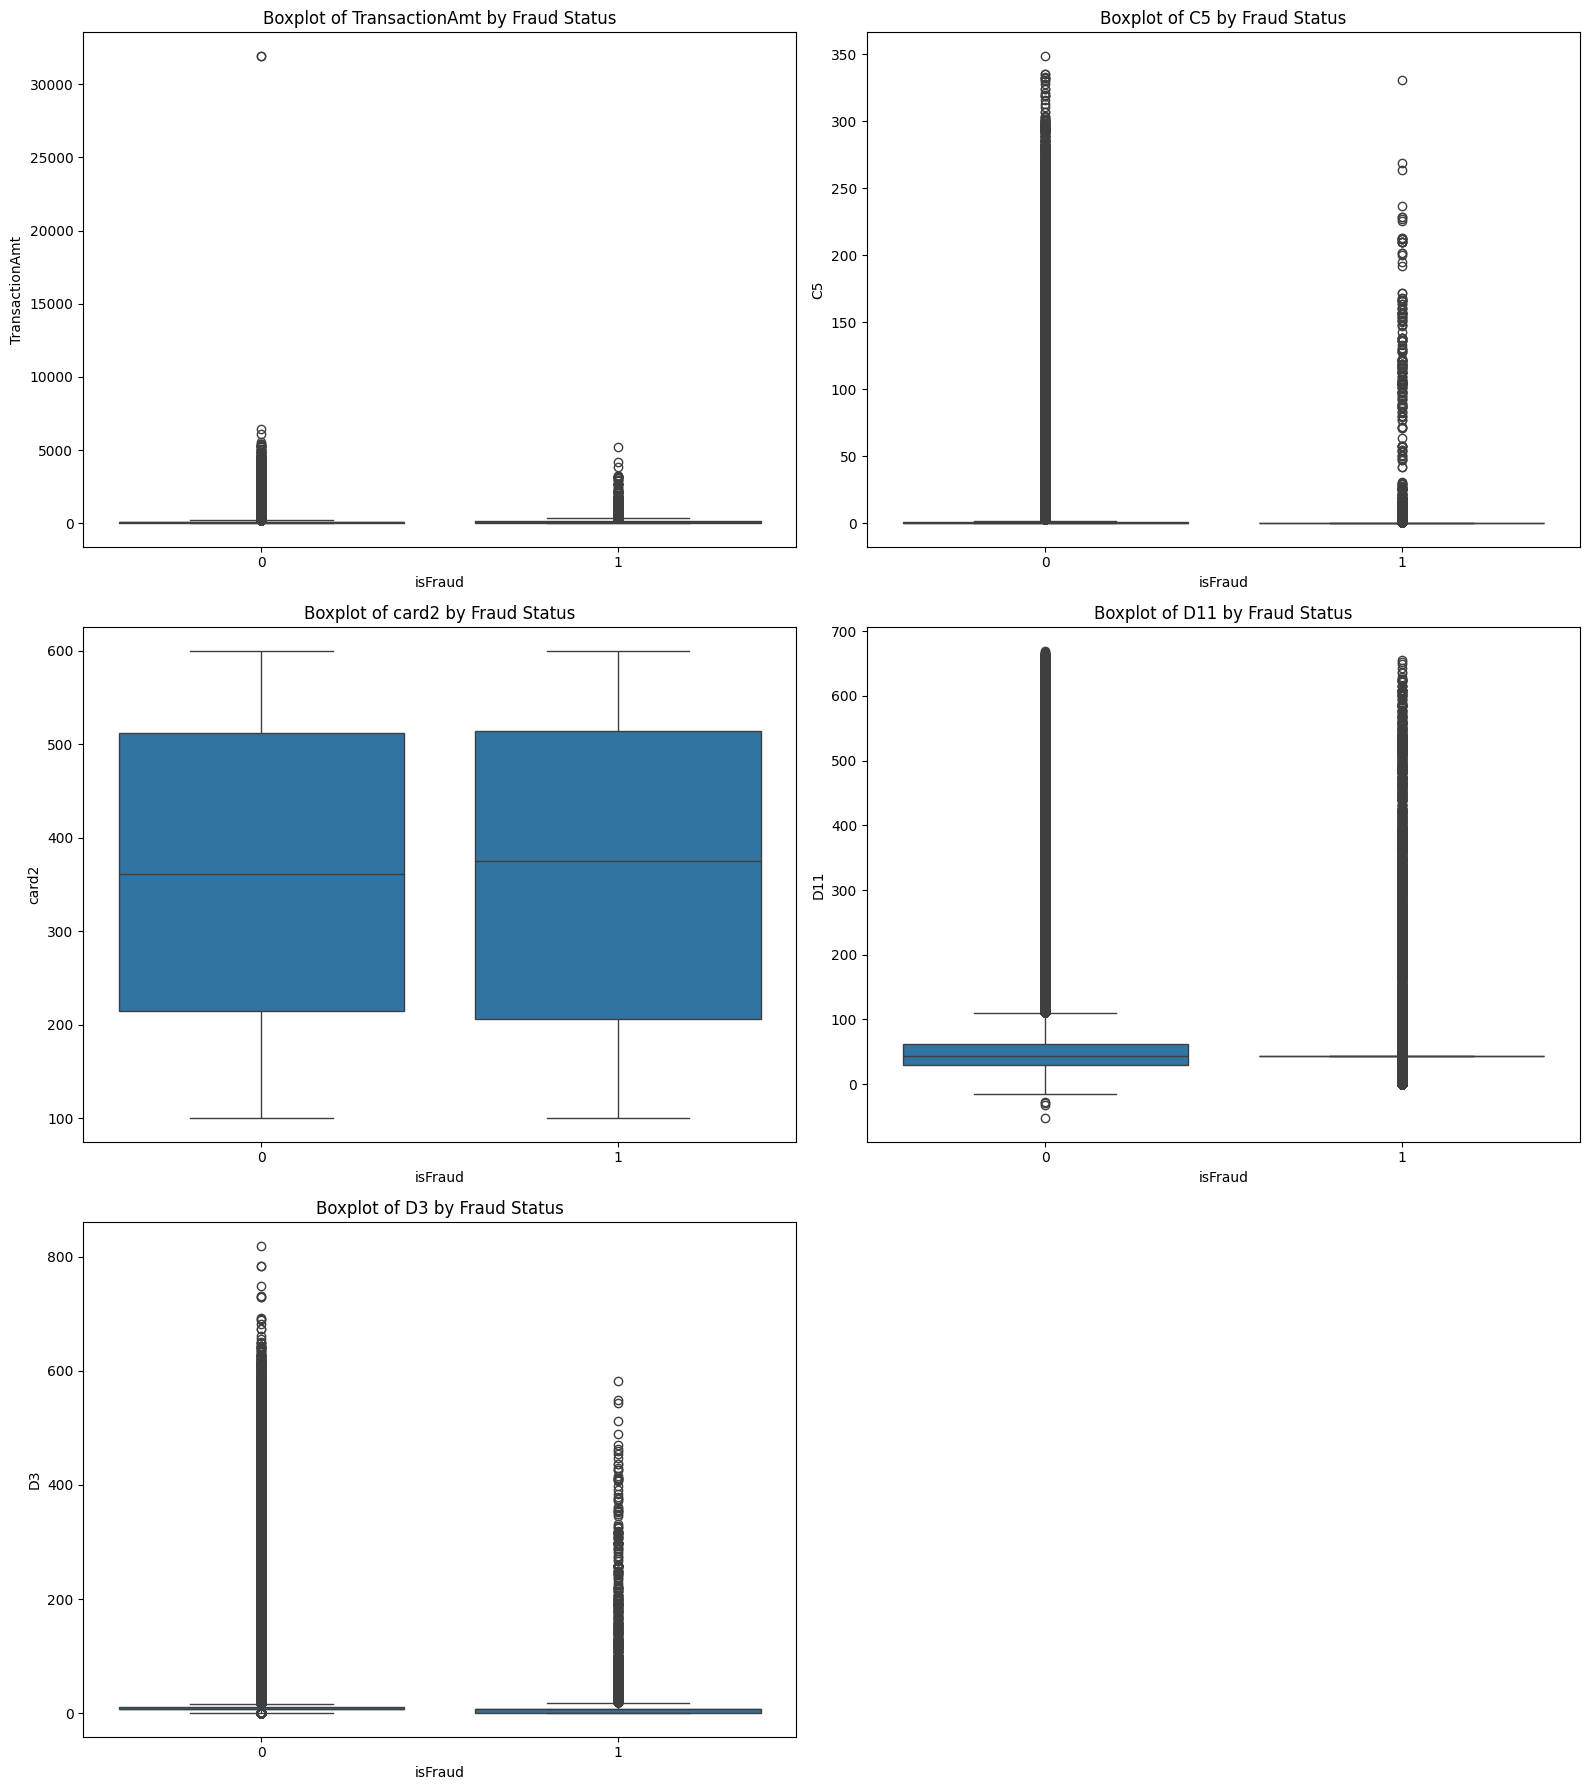

In [110]:
variables = ['TransactionAmt', 'C5', 'card2', 'D11', 'D3']
n_cols = 2
n_rows = int(np.ceil(len(variables) / n_cols))

plt.figure(figsize=(n_cols * 8, n_rows * 6))

for i, var in enumerate(variables, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='isFraud', y=var, data=data)
    plt.title(f'Boxplot of {var} by Fraud Status')

plt.tight_layout()
plt.show()

**Boxplot de TransactionAmt por fraude:** Se observa que la mediana de la cantidad de transacción para los casos fraudulentos es más baja que para los casos no fraudulentos. También hay puntos extremos en ambos casos, indicando valores atípicos. La dispersión parece ser mayor en las transacciones no fraudulentas.

**Boxplot de C5 por fraude:** La variable C5 muestra una cantidad considerable de valores atípicos en ambas categorías de fraude. La distribución parece ser similar entre los dos grupos.

**Boxplot de card2 por fraude:** Esta parece ser otra variable categórica o una con un número limitado de valores distintos. La distribución es casi idéntica en ambos grupos, con los mismos 'pisos' y 'techos' del boxplot, lo que sugiere que card2 no varía con respecto al fraude.

**Boxplot de D11 por fraude:** La variable D11 muestra algunos valores extremos, especialmente en las transacciones no fraudulentas. La mediana y la dispersión parecen ser más grandes en las transacciones no fraudulentas.

**Boxplot de D3 por fraude:** La variable D3 muestra una gran cantidad de valores atípicos en las transacciones no fraudulentas y una mayor dispersión en comparación con las transacciones fraudulentas.

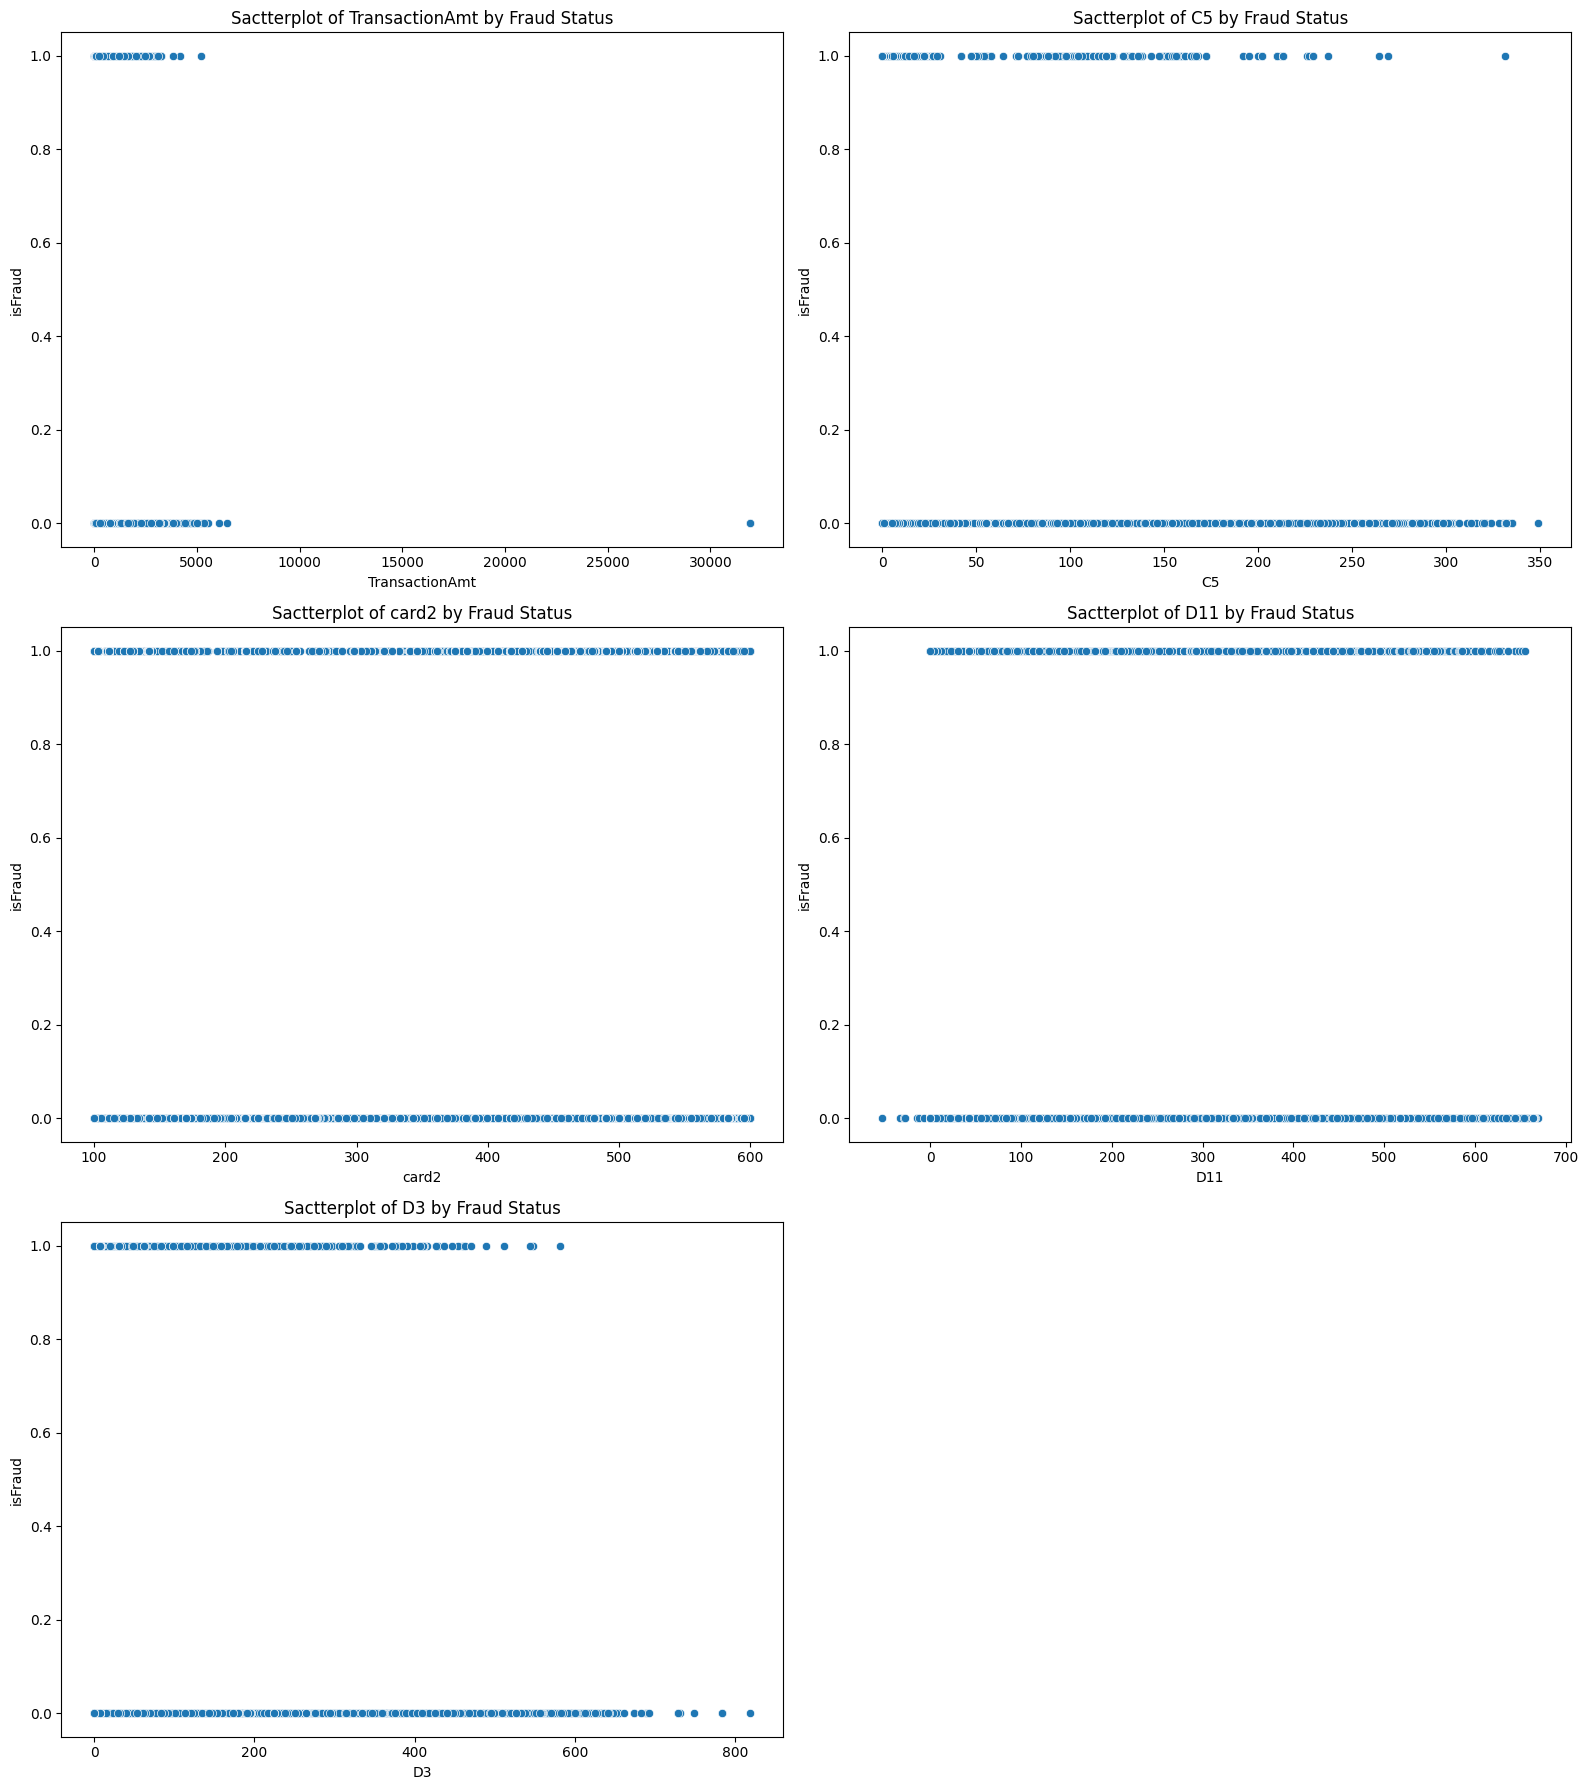

In [ ]:
plt.figure(figsize=(n_cols * 8, n_rows * 6))

for i, var in enumerate(variables, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=var, y='isFraud', data=data)
    plt.title(f'Sactterplot of {var} by Fraud Status')

plt.tight_layout()
plt.show()

**Scatterplot de TransactionAmt por fraude:** La mayoría de las transacciones, tanto fraudulentas como no fraudulentas, parecen tener montos más bajos. Hay unos pocos valores atípicos con montos más altos en el lado no fraudulento.

**Scatterplot de C5 por fraude:** Los puntos se concentran en valores bajos para ambas categorías, con pocos valores atípicos. No hay una diferencia distintiva visible entre los estados de fraude.

**Scatterplot de card2 por fraude:** Los datos parecen distribuirse uniformemente a lo largo de varios valores distintos, con una cantidad similar de puntos para cada estado de fraude.

**Scatterplot de D11 por fraude:** Los puntos están ampliamente distribuidos, pero no hay una clara distinción entre transacciones fraudulentas y no fraudulentas.

**Scatterplot de D3 por fraude:** Hay una distribución amplia de puntos para las transacciones no fraudulentas y unos pocos valores atípicos para las fraudulentas. Sin embargo, no hay una separación clara entre los grupos.

## Merge de los dos datasets
Ahora realizaremos un merge de los dos datasets usando la columna *TransactionID*

In [ ]:
final_dataset = pd.merge(final_transaction, identity, on='TransactionID', how='inner')